**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 9 - Optimalizácia </font>** 

<a id=table_of_contents></a>
##  Obsah
* [Úvod](#uvod) 


* [Minimalizácia funkcie jednej reálnej premennej](#jednorozmerne) 


* [Minimalizácia funkcie viacerých reálnych premenných](#viacrozmerne) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.**

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod</font> 

Problém inžinierskeho návrhu vedie k funkcii

$$f(x,y)=\cos\left(x^2\right)+e^{(y-6)^2}+3(x+y)^4$$

kde $x$ a $y$ sú parametre, ktoré je potrebné zvoliť/nastaviť a $f(x,y)$ je funkcia súvisiaca s výrobnými nákladmi, teda je potrebné ju minimalizovať. V aktuálnej téme predstavíme vybrané numerické metódy vyvinuté na lokalizáciu optimálnych bodov $[x, y]$ (resp. ich aproximáciu) v takýchto úlohách.

Optimalizačné úlohy spočívajú vo výbere najlepšieho riešenia z danej množiny možných riešení. Matematicky sa dá optimalizačná úloha formulovať ako nájdenie prvku $x^*\in M$ takého, že pre ľubovoľný prvok $x\in M$ platí 

\begin{align*}\label{eq:Optim1} \tag{1}
f\left(x^*\right)\le f(x), \quad \forall x \in M, 
\end{align*}

kde $f:M\to\mathbb{R}$ je minimalizovaná **_účelová_** (cieľová / kriteriálna) funkcia a $M$ je **_množina prípustných riešení_**. Pokiaľ prípustným riešením môže byť každý bod $x=[x_1,x_2,\ldots,x_n]$ $n$-rozmerného Euklidovho priestoru $\mathbb{R}^n$, tak potom $M=\mathbb{R}^n$ a hovoríme o **_nepodmienenej optimalizácii_**. O účelovej funkcii $f$ budeme predpokladať, že je spojitá a v závislosti od prezentovanej metódy budeme predpokladať aj existenciu derivácií príslušných rádov.   

Optimalizačná úloha \eqref{eq:Optim1} sa nazýva **_úlohou globálnej optimalizácie_**. My sa obmedzíme na jednoduchšiu úlohu tzv. **_lokálnej optimalizácie_**, ktorá spočíva v nájdení **_lokálneho minima_**, t.j. prvku $x^*\in M$ takého, že platí 

\begin{align*}\label{eq:Optim2} \tag{2}
f\left(x^*\right)\le f(x), \quad \forall x \in M\cap O\left(x^*\right), 
\end{align*}

kde $O\left(x^*\right)$ je nejaké okolie bodu $x^*$. 

Podrobnejšie sa pozrieme na dve špeciálne úlohy: oboznámime sa s metódami pre minimalizáciu funkcie jednej premennej na intervale $\langle a,b \rangle$; následne sa budeme zaoberať metódami nepodmienenej minimalizácie funkcie viacerých premenných. 

--- 

#### Poznámka 1 

Určenie maxima funkcie $g(x)$ sa dá previesť na úlohu určenia minima funkcie $f(x)=-g(x)$.   

---

Všeobecná optimalizačná úloha sa niekedy uvádza v tomto všeobecnom tvare: 

\begin{align*}
\text{minimalizovať} \quad & f(x) \\
\text{vzhľadom k} \quad & c_i(x) = 0, \quad i\in\{1,2,\ldots,m_1\} \\ 
& g_j(x) \le 0, \quad j\in\{1,2,\ldots,m_2\} \\
\text{pričom} \quad & f:D\to\mathbb{R}; \, c_i,g_j: D\to\mathbb{R}, \text{ kde } D\subset\mathbb{R}^n \text{ a } x=[x_1,\ldots,x_n].
\end{align*}

Takto sformulovaný optimalizačný problém sa niekedy nazýva **_nelineárny program_**. Toto pomenovanie nevychádza z počítačového programovania, ale zo skutočnosti, že optimalizačné problémy často pochádzajú z operačného výskumu, kde riešenie problému poskytuje manažérom program výroby a distribúcie. V tomto kontexte účelová funkcia $f$ predstavuje celkové náklady, ktoré je potrebné minimalizovať. Špeciálnym prípadom uvedenej optimalizačnej úlohy je napr. **_úloha lineárneho programovania_** (lineárny program), kde $f,c_i,g_i$ sú lineárne funkcie. Ak sú tieto funkcie konvexné, hovoríme o **_konvexnom optimalizačnom probléme_**. 

Je známe, že všeobecný optimalizačný problém patrí k tzv. **_NP-úplným_** problémom. Pre výpočtové problémy patriace do tejto triedy nie je známy žiaden algoritmus, ktorého výpočtový čas by bol $O\left(n^k\right)$ pre každú inštanciu daného problému (t.j. pre každé $f,c_i,g_i$ v našom prípade). Pokiaľ také $k$ existuje ($n$ je veľkosť vstupu), potom uvažovaný algoritmus beží resp. počíta v **_polynomiálnom čase_**. Z praktického hľadiska teda neexistuje žiaden všeobecný algoritmus, ktorý by vyriešil všeobecnú optimalizačnú úlohu (resp. každú jej inštanciu tzn. pre ľubovoľnú voľbu $f,c_i,g_i$) v polynomiálnom čase. Na druhej strane však niektoré inštancie všeobecnej optimalizačnej úlohy ako napr. lineárny či konvexný program, sa dajú riešiť v polynomiálnom čase (napr. metódami vnútorného bodu). 

Na záver úvodnej časti ešte podotkneme, že **optimalizácia úzko súvisí s metódami riešenia sústav nelineárnych rovníc**. Totiž, ak chceme nájsť približné riešenie sústavy nelineárnych rovníc 

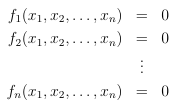 


tak môžeme miesto toho hľadať minimum funkcie 

 

a približné minimum potom spresniť rýchlou, avšak iba lokálne konvergentnou _Newtonovou metódou_. 

Naopak, za predpokladu, že funkcia $f(x_1,x_2,\ldots,x_n)$ má parciálne derivácie podľa všetkých svojich premenných, potom bod, v ktorom nastáva extrém je nutne stacionárnym bodom a je možné ho nájsť ako riešenie sústavy rovníc 

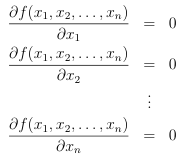 


***
<a id=jednorozmerne></a>
 # <font color=brown> Minimalizácia funkcie jednej reálnej premennej </font> 

V tejto časti uvedieme metódy pre približné určenie bodu $x^*$, v ktorom sa nadobúda lokálne minimum funkcie $f(x)$ na intervale $\langle a,b \rangle$. Pokiaľ je funkcia $f$ na intervale $\langle a,b \rangle$ _unimodálna_, tzn. keď má na danom intervale jediné minimum, potom je možné ho približne nájsť pomocou metód, ktoré tu uvedieme. Ak má funkcia $f$ na intervale $\langle a,b \rangle$ viacero lokálnych miním, prezentované metódy nájdu jedno z nich.   

***

### <font color=red> Definícia 1</font> 

Hovoríme, že funkcia $f$ definovaná na intervale $I=\langle a,b \rangle$ resp. $I=(-\infty,\infty)$ je na tomto intervale **_unimodálna_** práve vtedy, keď existuje jediné $x^*$ také, že pre ľubovoľnú dvojicu čísel $c,d\in I$, $c<d$ platí 

$$c<d\le x^* \Rightarrow f(c)>f(d); \quad d>c\ge x^* \Rightarrow f(c)<f(d),$$

tzn. $f$ je ostro klesajúca naľavo od $x^*$ a ostro rastúca napravo od $x^*$. 

***

--- 

#### Poznámka 2 

* Existencia jediného (globálneho) minima  však nie je ekvivalentná s unimodálnosťou. Pokiaľ $\langle c,d \rangle \subset \langle a,b \rangle$ a $f$ je unimodálna na $\langle a,b \rangle$, potom $f$ je unimodálna na $\langle c,d \rangle$ práve vtedy, keď tento interval obsahuje bod minima $x^*\in \langle c,d \rangle$. 


* Z definície unimodálnej funkcie vyplýva, že ak nájdeme tri rôzne body, na ktorých funkcia nie je ostro monotónna, tak nutne musí medzi týmito bodmi ležať bod $x^*$, v ktorom funkcia nadobúda minimum.  

---

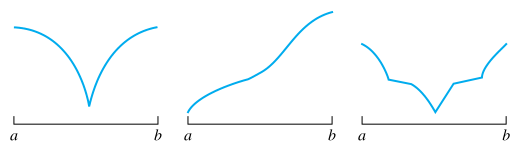 
$$\textit{Tri príklady unimodálnych funkcií na intervale } \langle a,b \rangle$$
$$\text{Zdroj: Cheney W. & Kincaid D. R. (2007).}$$

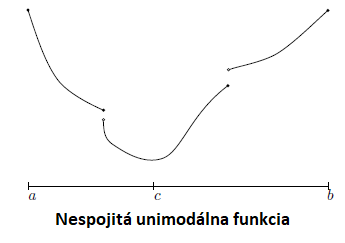

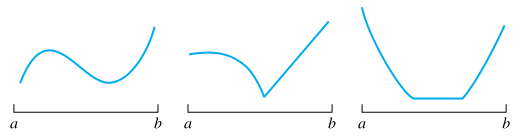 
$$\textit{Tri príklady funkcií, ktoré nie sú unimodálne na intervale } \langle a,b \rangle$$
$$\text{Zdroj: Cheney W. & Kincaid D. R. (2007).}$$

Vzhľadom k vyššie uvedenému, bude pre funkciu unimodálnu na celej reálnej osi fungovať nasledujúci **algoritmus pre hľadanie počiatočného intervalu obsahujúceho bod minima** (na tomto intervale je uvažovaná funkcia opäť unimodálna):  

1. Začni v ľubovoľnom bode $x_0$; 


2. Nastav krok $h$ i akceleráciu $ac\ge1$; 


3. Vypočítaj funkčné hodnoty v bodoch $c:=x_0$, $a:=x_0-h$, $b:=x_0+h$ a ich porovnaním zisti, či medzi nimi leží bod minima uvažovanej funkcie; ak áno, tak ukonči procedúru; ak nie, tak sa posuň o krok $h:=ac\cdot h$ v smere klesania funkčných hodnôt a procedúru zopakuj.

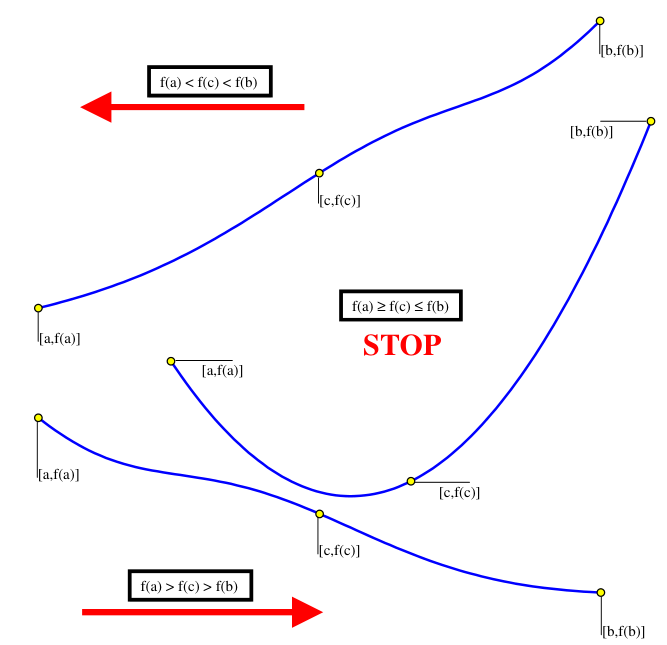 
$$\text{Zdroj: Růžičková, I. & Hlavička, R. (2020).}$$


<font color=orange> Ilustrujte algoritmus hľadania počiatočného intervalu obsahujúceho bod minima na vhodnom príklade v Python-e. Uvažovanú funkciu vykreslite. </font> 

Ďalej uvedieme niekoľko metód, ktoré patria do skupiny tzv. **_metód intervalovej redukcie_** a majú blízko k metóde [polenia intervalu](https://www.vedantu.com/maths/bisection-method) ([metóda bisekcie](https://wiki.sagemath.org/interact/calculus#Root_Finding_Using_Bisection)). Vlastnosť "$f$ je unimodálna na intervale $\langle a,b \rangle$" je pritom analógiou vlastnosti $f(a)f(b)<0$. 

Predpokladajme, že $f$ je unimodálna na intervale $\langle a,b \rangle$. Potom porovnaním funkčných hodnôt v dvoch rôznych vnútorných bodoch $c,d\in\langle a,b \rangle$ je možné zistiť interval redukovanej dĺžky, na ktorom je $f$ opäť unimodálna. Nech je napr. $c<d$, potom 

\begin{align*}
f(c)\le f(d) \Rightarrow x^*\in\langle a,d \rangle, \\
f(c)>f(d) \Rightarrow x^*\in\langle c,b \rangle.
\end{align*}

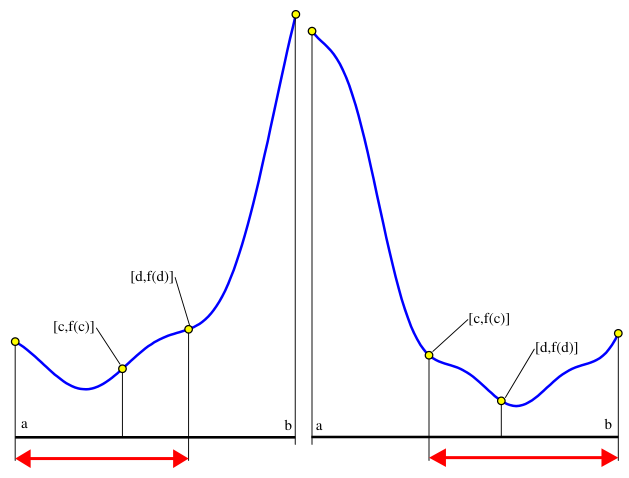 
$$\text{Zdroj: Růžičková, I. & Hlavička, R. (2020).}$$ 

Poznámka: Nech je napr. $f(c)\le f(d)$. Pokiaľ by bolo $d<x^*$, muselo by podľa definície unimodálnosti byť $f(c)>f(d)$, čo by bol spor s predpokladom. 

Zrejme dĺžka nového intervalu neprevýši $\max\{d-a,b-c\}$. Ďalej sa budeme zaoberať symetrickým prípadom, t.j. keď $d-a=b-c=t(b-a)$. Odtiaľ vyplýva 

\begin{align*}\label{eq:Optim3} \tag{3}
c&=b-t(b-a)=a+(1-t)(b-a), \\
d&=a+t(b-a).
\end{align*}

Podmienky $c<d$, $c,d\in(a,b)$ implikujú $0.5<t<1$. 

Ak zvolíme napr. hodnotu $t$ veľmi blízko k hodnote $0.5$, tak dostaneme metódu redukujúcu dĺžku intervalu takmer na polovicu za cenu výpočtu dvoch funkčných hodnôt v každom kroku. Existujú však chytrejšie analógie metódy polenia intervalu.

Klasickú intervalovú bisekciu **nie je možné použiť**. Totiž aj keď poznáme $f(a)$, $f(b)$, $f((a+b)/2)$, tak na základe toho sa nedá rozhodnúť, v ktorej polovici intervalu $\langle a,b \rangle$ sa nachádza minimum (potrebné sú funkčné hodnoty v dvoch vnútorných bodoch intervalu $\langle a,b \rangle$, ako je uvedené vyššie). 

Existuje však vhodná **_modifikácia metódy polenia intervalu (PI)_**. V tejto metóde sa rozdelí pôvodný interval $\langle a,b \rangle$ na štyri rovnaké časti 

\begin{align*}\label{eq:Optim4} \tag{4}
a<d<&c<e<b \\ 
c=(b+a)/2, \,\, d=(c&+a)/2, \,\, e=(b+c)/2. 
\end{align*}

Výber redukovaného intervalu sa riadi nasledujúcimi pravidlami: 

\begin{align*}
f(d)<f(c)&\Rightarrow x^*\in\langle a,c \rangle \\ 
f(e)>f(c)&\Rightarrow x^*\in\langle c,b \rangle \\ 
f(d)\ge f(c) \le f(e)&\Rightarrow x^*\in\langle d,e \rangle. 
\end{align*}

Nový interval má presne polovičnú dĺžku (odtiaľ názov metódy) a naviac nie je potrebné znovu počítať hodnotu funkcie v novom strede intervalu (bod $c$). Každý krok si vyžaduje výpočet dvoch funkčných hodnôt. 


---

<b> <ins> Algoritmus PI </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $a_0,\,b_0,\,c_0:=\dfrac{a_0+b_0}{2}$, $k:=0$; 

**Krok 2**

Pokiaľ $b_k-a_k\ge\varepsilon$, opakuj: 
 
* $d_k:=\dfrac{a_k+c_k}{2}$, $e_k:=\dfrac{c_k+b_k}{2}$; 


* ak $f(d_k)<f(c_k)$: $a_{k+1}:=a_k$, $b_{k+1}:=c_k$, $c_{k+1}:=d_k$; 

    * ináč ak $f(c_k)<f(e_k)$: $a_{k+1}:=d_k$, $b_{k+1}:=e_k$, $c_{k+1}:=c_k$; 
    
        * ináč $a_{k+1}:=c_k$, $b_{k+1}:=b_k$, $c_{k+1}:=e_k$; 


* $k:=k+1$; 

**Krok 3**

* $x_k:=c_k$;

**Krok 4** 

Výstup: $x_k$.   

---

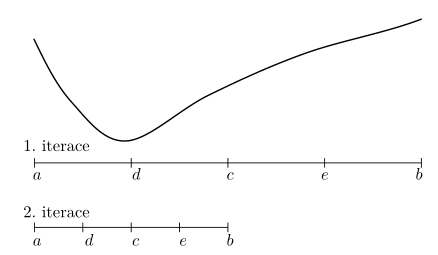

Je tiež možné aplikovať **_intervalovú trisekciu_** (špeciálny prípad intervalovej redukcie uvedenej vyššie), ktorej princíp je nasledovný: Nech $h=(b-a)/3$, potom $u=a+h$, $v=b-h$ delia interval $\langle a,b \rangle$ na tri rovnaké časti (miesto označenia $c,d$ pre vnútorné body sme teraz použili označenie $u,v$). Predpokladajme $f(u)<f(v)$. Potom minimum musí ležať (prečo?) vľavo od bodu $v$, takže krajný bod $b$ sa nahradí novým krajným bodom $v$. Týmto činom sa dĺžka intervalu (obsahujúceho minimum) skráti na dve tretiny svojej pôvodnej dĺžky. Bod $u$ sa teraz stáva stredom nového intervalu $\langle a,v \rangle$, preto už nebude v nasledujúcom kroku využiteľný pri hľadaní minima na tomto intervale. Vzniknutý interval $\langle a,v \rangle$ je potrebné znova rozdeliť na tri rovnaké časti pomocou dvoch nových bodov a vypočítať v nich funkčné hodnoty, čo je neefektívne.

<font color=purple> EXTRA: Zdôvodnite nasledujúce tvrdenie ohľadom metódy trisekcie: Ak $f(u)<f(v)$, potom minimum musí ležať vľavo od bodu $v$. Za korektné zdôvodnenie si môžete pripísať jeden bonusový bod.  </font> 

## Metóda zlatého rezu

Je založená na chytrejšom výbere deliacich (vnútorných) bodov $u,v$ ako intervalová trisekcia. Nech $h=\varrho(b-a)$, kde $\varrho$ je číslo o niečo väčšie než $1/3$, pričom jeho presnú hodnotu určíme. Potom zrejme body $u=a+h$, $v=b-h$ delia interval $\langle a,b \rangle$ na tri nerovnaké časti. V prvom kroku sa vypočíta $f(u)$, $f(v)$. Predpokladajme $f(u)<f(v)$. Potom vieme, že minimum je medzi $a,v$. Krajný bod $b$ sa nahradí novým krajným bodom $v$ a proces sa opakuje na intervale $\langle a,v \rangle$. Keď sa zvolí správna hodnota $\varrho$, tak bod $u$ bude mať výhodnú pozíciu a bude môcť byť použitý v ďalšom kroku. Tým pádom v každom ďalšom kroku sa bude počítať funkčná hodnota už iba raz (nie dvakrát ako pri intervalovej trisekcii). 

Ako teda zvoliť $\varrho$ ? Hľadanú hodnotu $\varrho$ je potrebné zvoliť tak, aby bod $u$ hral v novom (redukovanom) intervale $\langle a,v \rangle$ rovnakú úlohu ako bod $v$ v pôvodnom intervale $\langle a,b \rangle$, t.j. aby pomer dĺžky intervalu $\langle a,u \rangle$ k dĺžke intervalu $\langle a,v \rangle$ bol rovnaký ako pomer dĺžky intervalu $\langle a,v \rangle$ k dĺžke intervalu $\langle a,b \rangle$ 

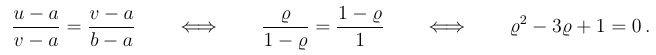 

Vyhovujúce riešenie je $\varrho=\dfrac{3-\sqrt{5}}{2}\approx 0.382$, kde $\tau=1-\varrho=\dfrac{\sqrt{5}-1}{2}\approx 0.618$ je číslo známe ako **_pomer zlatého rezu_** (viď nasledujúci obrázok, kde $\rho\equiv\varrho$).

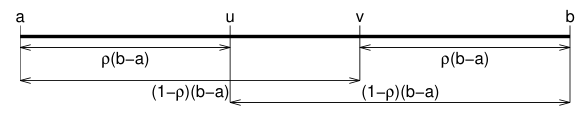
$$\text{Zdroj: Čermák (2020).}$$


--- 

#### Poznámka 3 

* Hovoríme, že bod delí interval v pomere zlatého rezu, keď dva novovzniknuté podintervaly majú túto vlastnosť: pomer dĺžky kratšieho podintervalu k dĺžke dlhšieho podintervalu je rovnaký ako pomer dĺžky dlhšieho podintervalu k dĺžke celého intervalu. Z vyššie uvedenej konštrukcie je zrejmé, že bod $u$ (ale tiež bod $v$) delí interval $\langle a,b \rangle$ v pomere zlatého rezu.


* Spomeňme si, že s číslom $\tau$ sme sa stretli už v téme 5, kde sme uviedli rýchlosť konvergencie metódy sečníc $p=1+\tau\doteq 1.618$ (_[zlatý rez](https://www.quark.sk/zlaty-rez-je-len-jedno-konkretne-cislo/)_). 

---

Zatiaľ sme predpokladali $f(u)<f(v)$. V opačnom prípade, t.j. keď $f(u)\ge f(v)$, leží minimum v intervale $\langle u,b \rangle$ (prečo?), takže krajný bod $a$ je nahradený novým krajným bodom $u$. Ľahko nahliadneme, že v novom (skrátenom) intervale $\langle u,b \rangle$ bude mať $v$ rovnakú úlohu ako malo $u$ v pôvodnom intervale $\langle a,b \rangle$, preto hodnotu funkcie $f$ na novom intervale $\langle u,b \rangle$ stačí počítať iba raz. 

Platí, že dĺžka redukovaného intervalu je $\tau$-krát menšia ako dĺžka pôvodného intervalu. Z počiatočného intervalu $\langle a_0,b_0 \rangle = \langle a,b \rangle$ sa podľa uvedeného postupu zostrojí postupnosť vnorených intervalov $\langle a_1,b_1 \rangle \supset \langle a_2,b_2 \rangle \supset \ldots$, pričom tieto intervaly obsahujú hľadaný bod, v ktorom má funkcia $f$ minimum a dĺžka týchto intervalov je v každom kroku zredukovaná faktorom (násobkom) $\tau$.  V počiatočnom intervale $\langle a_0,b_0 \rangle$ sa určí $u_0=a+\varrho(b-a)$, $v_0=b-\varrho(b-a)$ a vypočíta sa $f(u_0)$, $f(v_0)$. Ďalej interval $\langle a_{k+1},b_{k+1} \rangle$, $k=0,1,\ldots$ vytvoríme pomocou $a_k,b_k,u_k,v_k,f(u_k),f(v_k)$ nasledovne: 

1. Ak $f(u_k)<f(v_k)$, tak 
 
a vypočíta sa $f(u_{k+1})$; 

2. V opačnom prípade, t.j. keď $f(u_k)\ge f(v_k)$, tak 
 
a vypočíta sa $f(v_{k+1})$. 

Po $k$ krokoch leží minimum v intervale $I_k:=\langle a_k,b_k \rangle$ s dĺžkou $|I_k|=b_k-a_k=\tau(b_{k-1}-a_{k-1})=\ldots=\tau^k(b_0-a_0)$. Stred $x_{k+1}$ intervalu $\langle a_k,b_k \rangle$ **aproximuje minimum $x^*$ s chybou** 

\begin{align*}\label{eq:Optim5} \tag{5}
\left|x_{k+1}-x^*\right|\le\dfrac{1}{2}(b_k-a_k)=\dfrac{1}{2}\tau^k(b_0-a_0). 
\end{align*}

Pre $k\to\infty$, zrejme $|I_k|\to0$ a $x_k\to x^*$. 

--- 

#### Poznámka 4 

Konvergencia metódy zlatého rezu je pomalá. Preto je v vhodné v blízkosti minima prejsť na metódu, ktorá konverguje rýchlejšie. Jednou z možností je napr. _metóda kvadratickej interpolácie_. 

---

***

#### <font color=blue> Príklad 1</font> 

Metódou zlatého rezu určíme minimum funkcie $f(x)=x^4-3x^3+x+7$. Ako počiatočný interval zvolíme $\langle a_0,b_0 \rangle=\langle 1,3 \rangle$. Môžeme si pri tom pomôcť napr. grafom funkcie. Výpočet budeme realizovať s presnosťou $\varepsilon=10^{-3}$, tzn. ak $b_k-a_k<2\varepsilon$, tak položíme $x_{k+1}=(a_k+b_k)/2$. Výpočet je zaznamenaný v nasledujúcej tabuľke. Podčiarknuté sú tie vnútorné body vyhľadávacieho intervalu, v ktorých sa počíta hodnota účelovej funkcie. 

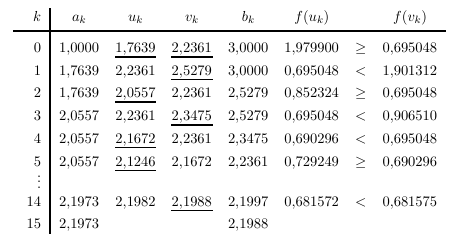


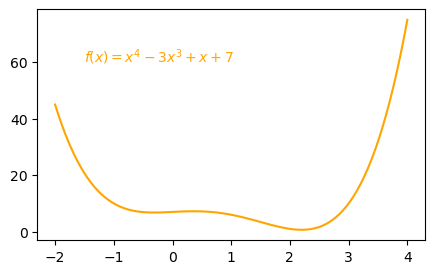

In [11]:
def f(x): 
    return x**4-3*x**3+x+7

x = np.linspace(-2, 4, 100)

fig = plt.figure(figsize=(5,3))
ax = plt.gca() 
plt.plot(x, f(x), color='orange')
ax.text(-1.5, 60, r'$f(x)=x^4-3x^3+x+7$', color='orange')
plt.show()

Požadovaná presnosť je dosiahnutá pre $k=15$, takže (po zaokrúhlení na tri desatinné cifry) $x_{16}\doteq2.198$. Hodnota účelovej funkcie sa počíta celkovo 16-krát. Keďže pre presnú hodnotu platí $x^*\doteq2.198266$, tak $x_{16}=2.198$ má všetky cifry platné.  

In [16]:
f = lambda x: x**4-3*x**3+x+7 

print(sci.optimize.minimize_scalar(f, method='golden', options={'xtol':1e-03})) # s presnostou 10^(-3)
print('======================================================================================================================') 
print(sci.optimize.minimize_scalar(f, method='golden')) # s prednastavenou presnostou 

     fun: 0.6815728629058624
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 0.001 )'
    nfev: 21
     nit: 15
 success: True
       x: 2.1985205130523537
     fun: 0.6815722641932052
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.4901161193847656e-08 )'
    nfev: 44
     nit: 38
 success: True
       x: 2.198265554736602


--- 

<font color=orange> Odkrokujte v Pythone výpočet z Príkladu 1. Pre porovnanie rýchlosti konvergencie vyskúšajte aj metódu obyčajnej trisekcie a výsledok okomentujte.  </font> 

--- 

#### Poznámka 5 

* Podobne by sa dalo dopracovať k metóde zlatého rezu, ak by sme vhodne určili hodnotu parametra $t$ vo vzťahu $(3)$ a to tak, aby sa dala využiť funkčná hodnota z predošlého kroku - podobne ako v modifikovanej metóde polenia intervalu. Ak teda bude $t<\sqrt{0.5}$, tak získame efektívnejšiu metódu. Podľa $(3)$ platí: 

$$d-c=a+t(b-a)-\left[a+(1-t)(b-a)\right]=(2t-1)(b-a).$$

Pokiaľ chceme v ďalšom kroku opätovne využiť bod $c$, tak musí platiť: 

$$d-c=t^2(b-a) \quad \text{alebo} \quad d-c=t(1-t)(b-a).$$

Prvá možnosť vedie ku kvadratickej rovnici $t^2-2t+1=0$ a poskytuje riešenie $t=0.5$, ktoré nevyhovuje podmienke (nerovnosti uvedenej vyššie). Druhá možnosť vedie k rovnici $t^2+t-1=0$ a dáva riešenie $\tau=\dfrac{\sqrt{5}-1}{2}=0.618033988749\ldots$. 


* Ak je počet krokov (iterácií) známy vopred, tak efektívnejšia je tzv. **_Fibonacciho metóda_** (pozrite [doplnkové materiály](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/FibonaccihoMetoda.pdf) alebo napr. [tento odkaz](http://lendek.net/teaching/OPT/numerical%20optimization.pdf)). 

---

## Metóda kvadratickej (parabolickej) interpolácie 

Ide v princípe o analógiu metódy sečníc (na hľadanie nulových bodov funkcie) ale pre optimalizačnú úlohu (hľadanie bodu minima funkcie). Podstata spočíva v tom, že v okolí bodu $x_k$ sa nahradí zadaná funkcia kvadratickým interpolačným polynómom $P_2(x)$ (polynóm prvého stupňa nemá minimum) a nová hodnota $x_{k+1}$ sa získa ako bod minima polynómu $P_2$. Za určitých okolností by mala postupnosť aproximácii $\{x_k\}$ konvergovať k bodu minima $x^*$ zadanej funkcie. 

Predpokladajme, že minimum leží v intervale $\langle a_k,b_k \rangle$, a že v nejakom jeho vnútornom bode $c_k$ hodnota funkcie $f$ nepresiahne hodnoty $f(a_k),f(b_k)$ v krajných bodoch $a_k,b_k$, tzn.

\begin{align*}\label{eq:Optim6} \tag{6}
\text{pre} \quad a_k<c_k<b_k \quad \text{platí} \quad f(c_k)\le\min\left\{f(a_k),f(b_k)\right\}. 
\end{align*} 

Bodmi $[a_k,f(a_k)]$, $[c_k,f(c_k)]$ a $[b_k,f(b_k)]$ preložíme parabolu $P^k_2(x)$ (kvadratický interpolačný polynóm) a bod $x_{k+1}$ minima paraboly považujeme za ďalšiu aproximáciu hľadaného bodu $x^*$. Vzorec pre výpočet $x_{k+1}$ dostaneme riešením lineárnej rovnice $\left(P_2^k(x_{k+1})\right)'=0$.  

Konkrétne teda v $k$-tom kroku môžeme interpolačný polynóm písať v tvare 

$$P_2^k(x)=f(c_k)+M(x-c_k)+N(x-c_k)^2.$$ 

Podmienky interpolácie sú nasledovné: 

\begin{align*}
P(c_k) &= f(c_k) \\ 
P(a_k) &= f(c_k)+M(a_k-c_k)+N(a_k-c_k)^2=f(a_k) \\
P(b_k) &= f(c_k)+M(b_k-c_k)+N(b_k-c_k)^2=f(b_k)
\end{align*}

Tieto podmienky generujú sústavu dvoch lineárnych rovníc s dvoma neznámymi: 

$$\left( 
    \begin{array}{cc|c}
        a_k-c_k & (a_k-c_k)^2 & f(a_k)-f(c_k) \\
        b_k-c_k & (b_k-c_k)^2 & f(b_k)-f(c_k) \\
    \end{array}
\right)$$

bod minima $x_{k+1}$ je daný vzťahom 

\begin{align*}
\dfrac{\mathrm{d}P}{\mathrm{d}x} &= M+2N\left(x^*-c_k\right)=0 \\ 
x_{k+1} &= c_k-\dfrac{1}{2}\dfrac{M}{N}. 
\end{align*}

Koeficienty $M,N$ sa určia Cramerovym pravidlom, čím dostaneme  

\begin{align*}\label{eq:Optim7} \tag{7}
x_{k+1}=c_k-\dfrac{1}{2}\dfrac{(c_k-a_k)^2\left[f(c_k)-f(b_k)\right]-(c_k-b_k)^2\left[f(c_k)-f(a_k)\right]}{(c_k-a_k)\left[f(c_k)-f(b_k)\right]-(c_k-b_k)\left[f(c_k)-f(a_k)\right]}. 
\end{align*} 

Následnou úpravou sa môžeme dopracovať k vyjadreniu 

$$x_{k+1}=\dfrac{1}{2}\dfrac{\left(a_k^2-c_k^2\right)f(b_k)+\left(b_k^2-a_k^2\right)f(c_k)+\left(c_k^2-b_k^2\right)f(a_k)}{(a_k-c_k)f(b_k)+(b_k-a_k)f(c_k)+(c_k-b_k)f(a_k)}.$$

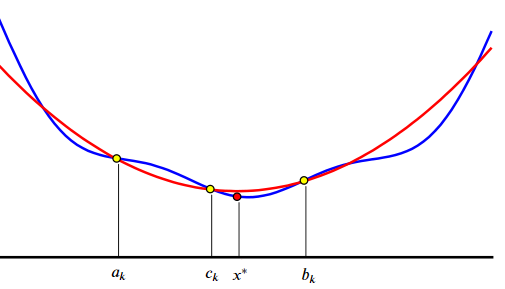 
$$\text{Zdroj: Růžičková, I. & Hlavička, R. (2020).}$$ 

Zo vzťahu \eqref{eq:Optim6} vyplýva, že $x_{k+1}\in(a_k,b_k)$. Ak náhodou $x_{k+1}=c_k$, tak priradíme do $x_{k+1}$ iný vnútorný bod z intervalu $(a_k,b_k)$. S týmto slabým miestom metódy kvadratickej interpolácie (a s ďalšími tu neuvedenými nedostatkami) sa úspešne vyrovnáva **_[Brentova metóda](https://www.youtube.com/watch?v=BQm7uTYC0sg&ab_channel=OscarVeliz)_**. 

Z bodov $a_k,b_k,c_k,x_{k+1}$ sa vyberie nový interval $(a_{k+1},b_{k+1})$ obsahujúci minimum a bod $c_{k+1}$ spĺňajúci podmienku $(6)$, tentokrát ale pre index $k+1$. Postupuje sa podľa nasledujúcich pravidiel: 

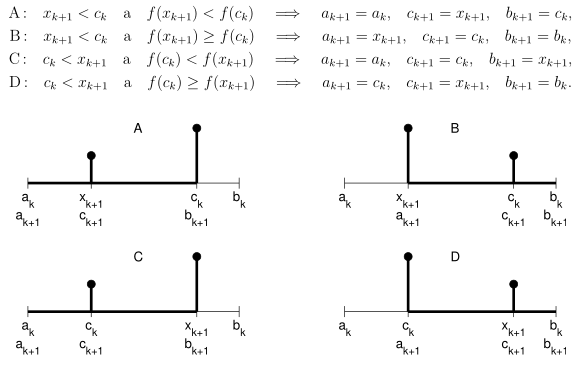 
$$\text{Zdroj: Čermák (2020).}$$


Výpočet končí a $x_{k+1}$ sa považuje za dostatočné dobrú aproximáciu bodu minima $x^*$, ak je splnené niektoré z **kritérií zastavenia** 

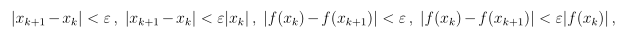 

kde $\varepsilon$ je predpísaná tolerancia. 

--- 

#### Poznámka 6 

* Výpočet $x_{k+1}$, $k=0,1,\ldots$ vyžaduje $k+3$ výpočtov funkčných hodnôt účelovej funkcie - konkrétne: $f(a_0),f(c_0),f(b_0)$ a ďalej $f(x_i)$, $i=1,2,\ldots,k$. 


* Dá sa ukázať, že pokiaľ metóda kvadratickej interpolácie konverguje, tak rýchlosť jej konvergencie je superlineárna rádu $p\approx1.324$. 

---

***

#### <font color=blue> Príklad 2</font> 

Približnú hodnotu minima funkcie $f(x)=x^4-3x^3+x+7$ určíme metódou kvadratickej interpolácie. Výpočet ukončíme, keď bude splnená nerovnosť $|x_{k+1}-x_k|<10^{-5}$. Výpočet je zaznamenaný v nasledujúcej tabuľke. V poslednom stĺpci je uvedené, ktorý z prípadov A,B,C,D nastáva a podčiarknuté sú (postupne zľava doprava) body $a_{k+1}<c_{k+1}<b_{k+1}$. Z tabuľky je zrejmé, že požadovaná presnosť bola dosiahnutá pre $x_6\doteq2.19827$ (všetky cifry sú platné). Hodnota účelovej funkcie sa počítala celkovo 8-krát. 

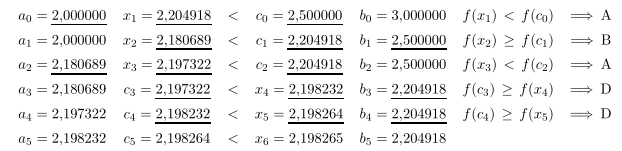 

In [21]:
from scipy import optimize

f = lambda x: x**4-3*x**3+x+7 

print(optimize.brent(f, tol=1e-05)) # s presnostou 10^(-5)
print('======================================================================================================================') 
print(optimize.brent(f)) # s prednastavenou presnostou 

2.1982576962163876
2.1982655656556793


--- 

<font color=orange> Odkrokujte v Python-e výpočet z Príkladu 2. </font> 

--- 

#### Poznámka 7 

Brentova metóda je kombinovaná metóda, ktorá v sebe spája spoľahlivosť metódy zlatého rezu a rýchlu konvergenciu metódy kvadratickej interpolácie. 

---

<font color=purple> EXTRA: Za funkčnú implementáciu Brentovej metódy spolu s ilustračnými príkladmi a porovnaním s niektorou inou (predchádzajúcou) metódou, je možné získať jeden bonusový bod. </font>

--- 

#### Poznámka 8 

**Metódy interpolácie nemusia vždy konvergovať!** Potrebná je dobrá počiatočná aproximácia bodu minima funkcie, podobne ako napr. pri metóde sečníc.   

---

## Newtonova metóda

Miesto Lagrangeovho interpolačného polynómu je možné použiť Taylorov polynóm druhého stupňa (v okolí bodu $x_k$) 

$$T(x)=f(x_k)+f'(x_k)(x-x_k)+\dfrac{1}{2}f''(x_k)(x-x_k)^2.$$

Bod minima $x_{k+1}$ sa nájde z rovnice 

\begin{align*}\label{eq:Optim8} \tag{8}
T'(x_{k+1})=f'(x_k)+f''(x_k)(x_{k+1}-x_k)=0,\\
x_{k+1}=x_k-\dfrac{f'(x_k)}{f''(x_k)}.
\end{align*} 

Predchádzajúci vzťah je totožný s Newtonovou iteračnou formulou pre rovnicu určujúcu stacionárny bod funkcie (jednorozmerný prípad sústavy rovníc uvedenej na konci úvodnej časti tohto učebného textu). 

***
<a id=viacrozmerne></a>
 # <font color=brown> Minimalizácia funkcie viacerých reálnych premenných </font> 

## Nelderova-Meadova metóda

Známa tiež ako **_metóda simplexov_**. Ide o populárnu metódu, ktorá **nevyužíva derivácie účelovej funkcie**. Patrí medzi tzv. **_komparatívne metódy_**, čo je skupina metód, ktoré hľadajú minimum účelovej funkcie $f$ porovnávaním jej hodnôt v určitých vybraných bodoch priestoru $\mathbb{R}^n$. Konkrétne pri metóde simplexov sú vybrané body vrcholy simplexu (pre $n=2$ ide o vrcholy trojuholníka a pre $n=3$ sa jedná o vrcholy štvorstena). 

Najprv budeme **fungovanie Nelderovej-Meadovej metódy ilustrovať v dvojrozmernom prípade** t.j. pomocou trojuholníkov. Následne popíšeme kľúčové kroky a myšlienky všeobecnejšie (t.j. v $n$-rozmernom prípade). 

Začneme v štartovacom bode $x_0$ a zostrojíme rovnostranný trojuholník $\triangle ABC$ tak, aby bod $T=x_0$ bol jeho ťažiskom (t.j. "priemer vrcholov" trojuholníka $\triangle ABC$). Potom nájdeme vrchol $P_{max}$ trojhuolníka $\triangle ABC$ taký, že funkcia $f$ v ňom nadobúda maximálnu hodnotu, tzn. 

$$f\left(P_{max}\right)\ge f\left(P\right) \quad \forall P\in\mathbb{V}=\left\{A,B,C\right\}.$$

Následne sa zostrojí _refelxia_ (zrkadlový obraz) tohto bodu vzhľadom k zostávajúcim bodom. 

$$D=\dfrac{2}{\left|\mathbb{V}^*\right|}\displaystyle\sum\limits_{P\in\mathbb{V}^*}P-P_{max}, \quad \text{kde} \quad \mathbb{V}^*=\mathbb{V} \setminus P_{max}.$$

Za predpokladu, že $P_{max}=A$, tak reflexiu ilustruje nasledujúci obrázok. 

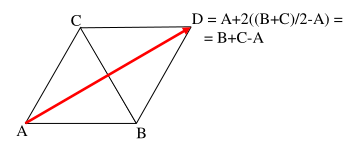 


Pokiaľ je $f(D)\le f(A)$, pokračuje sa trojuholníkom $\triangle BDC$ a tento krok sa nazýva _expanzia_. V opačnom prípade, t.j. pre $f(D)>f(A)$ sa urobí _kontrakcia_: tzn. trojuholník $\triangle ABC$ sa nahradí trojuholníkom $\triangle AB'C'$ podľa nasledujúceho obrázka 

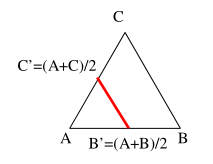 


Ďalší obrázok ilustruje niekoľko iterácií metódy simplexov aplikovanej na funkciu $g(x) = \sin(xy) + \cos(x + y)$, $[x,y] \in \langle−1,2\rangle \times \langle0,3\rangle$, pričom za aproximáciu bodu minima môžeme považovať ťažisko postupne vznikajúcich trojuholníkov. 

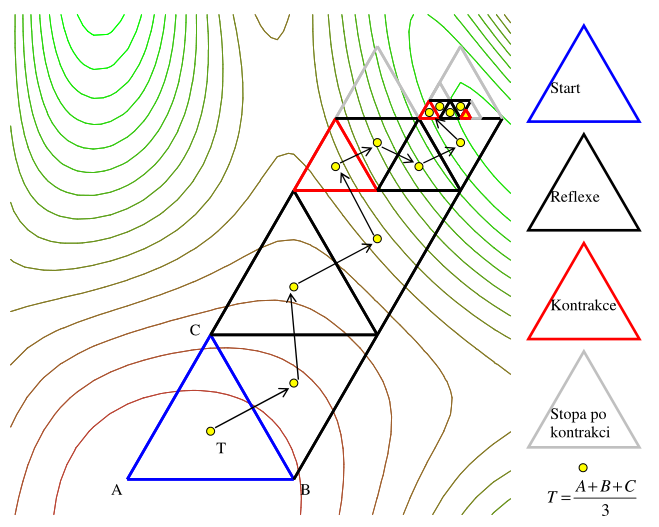 
$$\text{Zdroj: Růžičková, I. & Hlavička, R. (2020).}$$ 


Teraz pristúpime k **všeobecnému popisu metódy simplexov** (t.j. v $n$-rozmernom prípade). Základná myšlienka jedného kroku metódy je jednoduchá: medzi vrcholmi $x_0,x_1,\ldots,x_n$ simplexu sa vyberie najhorší vrchol $x_w$ (ang. _worst_), v ktorom je hodnota účelovej funkcie najväčšia a tento vrchol sa nahradí lepším vrcholom $\hat{x}$, v ktorom je hodnota účelovej funkcie menšia. </br>
Vrchol $\hat{x}$ sa hľadá na polpriamke, ktorá vychádza z najhoršieho vrcholu $x_w$ a prechádza ťažiskom $\bar{x}$ zvyšných vrcholov. Najlepší z nich sa označí $x_b$ (ang. _best_), tzn. $x_b$ je ten spomedzi vrcholov $x_0,x_1,\ldots,x_n$, v ktorom účelová funkcia nadobúda najmenšiu hodnotu. </br> 
Prvý pokus, ako vybrať $\hat{x}$ sa označuje pojmom **_reflexia_**: totiž bod $x_r=\bar{x}+(\bar{x}-x_w)$ je obraz bodu $x_w$ v stredovej súmernosti so stredom $\bar{x}$. Ak je $f(x_r)<f(x_b)$, potom to znamená, že pokles hodnôt na polpriamke $x_w\hat{x}$ je značný, preto skúsime ísť po tejto polpriamke ešte ďalej, do bodu $x_e=\bar{x}+2(\bar{x}-x_w)$. Výber bodu $x_e$ sa označuje pojmom **_expanzia_**. Pokiaľ platí $f(x_e)<f(x_b)$, potom $\hat{x}=x_e$, t.j. najhorší vrchol $x_w$ sa nahradí bodom $x_e$. </br> 
Ak $f(x_e)\ge f(x_b)$, skúsime použiť aspoň bod $x_r$. Podmienkou pre jeho zaradenie do simplexu je splnenie nerovnosti $f(x_r)<f(x_g)$ pre niektorý vrchol $x_g$ iný ako najhorší, tzn. $x_g\neq x_w$ (index $g$ pripomína anglické slovo _good_). Pokiaľ je uvedená podmienka splnená, tak sa vezme $\hat{x}=x_r$ miesto pôvodného $x_w$. 

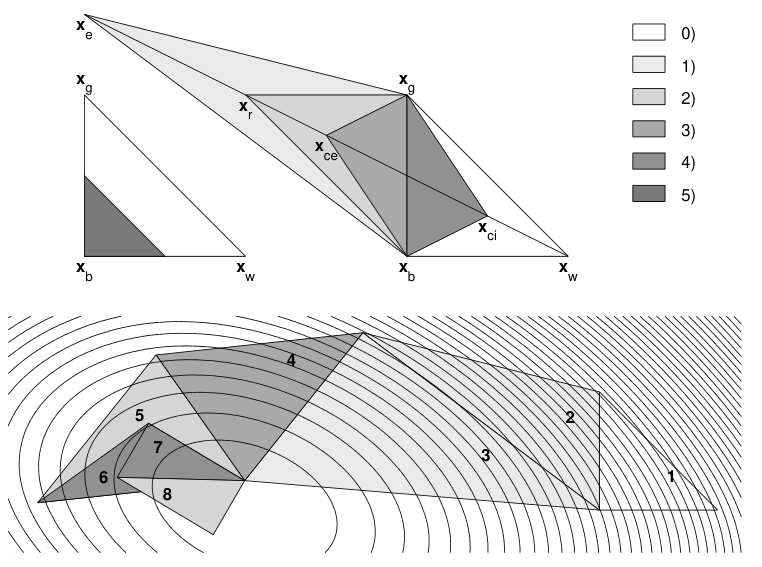 
$$\text{Zdroj: Čermák (2020).}$$ 

**Obrázok Nelderova-Meadova metóda:** 0) pôvodný trojuholník; 1) expanzia; 2) reflexia; 3) vonkajšia kontrakcia; 4) vnútorná kontrakcia; 5) redukcia. 


Keď nevyhovuje $x_e$ ani $x_r$, potom skúšame nájsť bod $\hat{x}$ na úsečke s koncovými bodmi $x_w$, $x_r$ tak, aby $f\left(\hat{x}\right)<\min\left\{f(x_w),f(x_r)\right\}$. Konkrétne postupujeme takto: 

a) pokiaľ $f(x_r)<f(x_w)$, skúsime bod $x_{ce}=\dfrac{1}{2}\left(\bar{x}+x_r\right)$ (leží bližšie k bodu $x_r$) a keď $f(x_{ce})<f(x_r)$, potom $\hat{x}=x_{ce}$, takže priradíme $x_w:=x_{ce}$; 

b) ak $f(x_r)\ge f(x_w)$, skúsime bod $x_{ci}=\dfrac{1}{2}\left(\bar{x}+x_w\right)$ (leží bližšie k bodu $x_w$) a keď $f(x_{ci})<f(x_w)$, potom $\hat{x}=x_{ci}$, takže priradíme $x_w:=x_{ci}$;. 

Výber bodu $x_{ce}$ resp. $x_{ci}$ označujeme pojmom **_kontrakcia_** - v dolnom indexe značí písmeno "c"  anglické slovo _contraction_, písmeno "e" značí anglické slovo _external_ ($x_{ce}$ leží mimo pôvodného simplexu) a písmeno "i" značí anglické slovo _internal_ ($x_{ci}$ leží vo vnútri pôvodného simplexu). 

Ak nevyhovuje žiaden z bodov $x_e,x_r,x_{ce},x_{ci}$, tak usúdime, že vrchol $x_b$, v ktorom účelová funkcia nadobúda najmenšiu hodnotu, je blízko minima. Preto sa urobí **_redukcia simplexu_**: vrchol $x_b$ ostane v simplexe a ostatné vrcholy $x_i$ sa posunú do stredov úsečiek $x_bx_i$. Simplex sa teda stiahne (zredukuje) k najlepšiemu vrcholu $x_b$. 

**_Transformáciu simplexu_**, predstavujúcu jeden krok Nelderovej-Meadovej metódy, popíšeme v piatich bodoch nasledovne: 

1. expanzia: $f(x_r)<f(x_b)$ a naviac $f(x_e)<f(x_b)\Rightarrow x_w:=x_e$; 

2. reflexia: $f(x_r)<f(x_g)$ pre nejaký vrchol $x_g\neq x_w \Rightarrow x_w:=x_r$; 

3. vnútorná kontrakcia: $f(x_r)<f(x_w)$ a naviac $f(x_{ce})<f(x_r) \Rightarrow x_w:=x_{ce}$;  

4. vonkajšia kontrakcia: $f(x_r)\ge f(x_w)$ a naviac $f(x_{ci})<f(x_w)\Rightarrow x_w:=x_{ci}$; 

5. redukcia: $x_i:=\frac{1}{2}(x_b+x_i)$ pre všetky $x_i\neq x_b$. 

Body 1-5 prechádzame postupne zhora-dolu. Keď niektorá z podmienok v bodoch 1 až 4 nie je splnená, prejde sa na nasledujúci bod. Ak podmienka je splnená, tak sa urobí priradenie do $x_w$ podľa pravidla za šípkou a transformácia je hotová. Pokiaľ nie je splnená podmienka v žiadnom z bodov 1 až 4, vykoná sa redukcia podľa bodu 5. 

Na začiatku výpočtu je daná počiatočná aproximácia $x_0=\left[x_1^{(0)},x_2^{(0)},\ldots,x_n^{(0)}\right]$ a malé číslo $\delta$. Ďalšie vrcholy $x_i$ **_štartovacieho simplexu_** sa odvodia z vrcholu $x_0$ tak, že k jeho $i$-tej zložke $x_i^{(0)}$ sa pripočíta číso $\delta$, t.j. $x_i=\left[x_1^{(0)},\ldots,x_i^{(0)}+\delta,\ldots,x_n^{(0)}\right]$, $i=1,2,\ldots,n$. 

Simplex sa opakovane transformuje. Výpočet končí a vrchol $x_b$ považujeme za dostatočne presnú aproximáciu bodu minima $x^*$, keď sú vrcholy simplexu navzájom dosť blízko a funkčné hodnoty v nich sa líšia iba minimálne, tzn. keď pre predpísané tolerancie $\varepsilon_1$, $\varepsilon_2$ platí 

\begin{align*}\label{eq:Optim9} \tag{9}
\lVert x_i-x_b \rVert < \varepsilon_1 \quad \text{a súčasne} \quad |f(x_i)-f(x_b)|<\varepsilon_2 \quad \text{pre každý vrchol} \quad x_i\neq x_b.  
\end{align*} 


--- 

#### Poznámka 9 

* Nelderova-Meadova metóda je **_heuristická metóda_** (heuristický alebo tiež objavovací/objaviteľský je taký prístup, ktorý je založený nie len na logickom uvažovaní a skúsenostiach, ale tiež na pozorovaní či experimentovaní). 


* Metóda je vhodná pre minimalizáciu funkcií s menším počtom premenných (cca do 10). 


* O konvergencii uvedenej metódy sa toho veľa nevie, no v praxi je metóda dosť úspešná. Je preto považovaná za spoľahlivú resp. **_robustnú_** optimalizačnú metódu. 


* Podstatnou nevýhodou metódy je to, že je pomalá v blízkosti (bodu) minima. Veľký objem potrebných výpočtov hovorí tiež v neprospech tejto metódy.  

---

***

#### <font color=blue> Príklad 3</font> 

Funkcia $f(x,y)=70\left[(x-2)^4+(x-2y)^2\right]$ nadobúda minimum v bode $[x^*,y^*]=[2,1]$. Výpočet urobíme pomocou Nelderovej-Meadovej metódy, pričom zvolíme $x_0=[2.1,0.7]$ a $\delta=0.1$ Výpočty sú realizované presne, avšak do nasledujúcej tabuľky (kvôli úspore miesta) zapisujeme hodnoty zaokrúhlené na dve desatinné miesta. Pre každý bod zapisujeme v stĺpci pod sebou $x$-ovú súradnicu, $y$-ovú súradnicu a funkčnú hodnotu. V rámčeku uvádzame novo určený lepší bod $\hat{x}$ (a funkčnú hodnotu v ňom). 

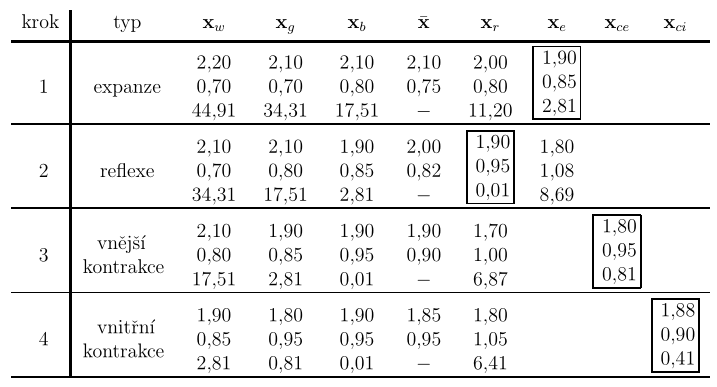 
$$\text{Zdroj: Čermák (2020).}$$  

Pre $\varepsilon_1=10^{-4}$ a $\varepsilon_2=10^{-8}$ výpočet končí po 47 krokoch, pričom $x_b\doteq [1.999953,0.999976]$. 

In [37]:
from scipy import optimize

f = lambda x: 70*((x[0]-2)**4+(x[0]-2*x[1])**2) 
x0 = [2.1,0.7]

res = optimize.minimize(f, x0, method='Nelder-Mead', tol=1e-04) 
print(res)

 final_simplex: (array([[1.99997316, 0.99998658],
       [1.99994591, 0.99997295],
       [2.00005764, 1.00002881]]), array([2.07241033e-15, 7.18133838e-15, 8.67881759e-15]))
           fun: 2.072410325758739e-15
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 54
        status: 0
       success: True
             x: array([1.99997316, 0.99998658])


In [17]:
f([1.99997316, 0.99998658])

3.6326878888567065e-17

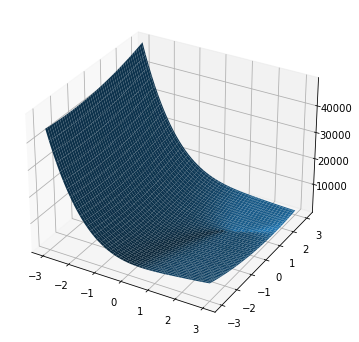

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, x) 
fig1=plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, f([X, Y]))
plt.show()

--- 

***

#### <font color=blue> Príklad 4</font> 

V tomto príklade ilustrujeme aplikáciu Nelderovej-Meadovej metódy na tzv. [Rosenbrockovu funkciu](https://en.wikipedia.org/wiki/Rosenbrock_function), ktorá sa častokrát používa na testovanie optimalizačných algoritmov. 

In [30]:
from scipy.optimize import rosen
X = 0.1 * np.arange(10) 
# 10-rozmerna Rosenbrockova funkcia 
rosen(X)

76.56

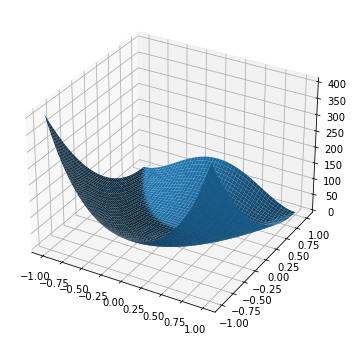

In [32]:
# vizualizacia dvojrozmernej Rosenbrockovej funkcie 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, x)
fig2=plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen([X, Y]))
plt.show()

In [35]:
from scipy.optimize import minimize, rosen, rosen_der 
# numericke hladanie minima 5-rozmernej Rosenbrockovej funkcie 
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res

 final_simplex: (array([[1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028],
       [0.99999999, 0.99999996, 0.99999994, 0.99999986, 0.99999971],
       [1.00000005, 1.00000007, 1.00000017, 1.00000031, 1.00000063],
       [1.00000004, 1.00000008, 1.00000013, 1.00000025, 1.00000047],
       [0.99999999, 0.99999996, 0.99999994, 0.99999984, 0.99999963],
       [1.00000005, 1.00000004, 1.00000003, 1.00000003, 1.00000004]]), array([1.94206402e-13, 2.44964782e-13, 3.10422870e-13, 3.37952410e-13,
       5.52173609e-13, 7.16586838e-13]))
           fun: 1.9420640199868412e-13
       message: 'Optimization terminated successfully.'
          nfev: 494
           nit: 295
        status: 0
       success: True
             x: array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

--- 

<font color=orange> Aplikujte Nelderov-Meadov algoritmus implementovaný v Python-e (knižnica _scipy_, modul _optimize_) na nájdenie lokálnych miním funkcie $h(x)=x^2+2\sin(\pi x)$. Vizualizujte zadanú funkciu vrátane jej lokálnych miním. </font> 

Ďalej uvádzame algoritmus Nelderovej-Meadovej metódy (NM), pre lepšiu názornosť budeme uvažovať funkciu $f$ dvoch premenných, t.j. $f(x,y)$. 

---

<b> <ins> Algoritmus NM </ins> </b> 

**Krok 1** 

Vstup: funkcia $f$, počiatočné body (vrcholy) $x_1^{(0)},x_2^{(0)},x_3^{(0)}$, $\varepsilon>0$ (presnosť); 

**Krok 2**

* vypočítaj $f\left(x_1^{(0)}\right)$, $f\left(x_2^{(0)}\right)$, $f\left(x_3^{(0)}\right)$ a priraď $x_b$, $x_g$, $x_w$ podľa funkčných hodnôt v bodoch $x_1^{(0)},x_2^{(0)},x_3^{(0)}$ (najmenšia funkčná hodnota v $x_b$, najväčšia funkčná hodnota v $x_w$); 


**Krok 3**

Pokiaľ nie je splnené zastavovacie kritérium, opakuj: 
 
* priraď $x_b$, $x_g$, $x_w$ podľa funkčných hodnôt v bodoch simplexu; 


* $\bar{x}:=(x_b+x_g)/2$, $x_r:=2\bar{x}-x_w$;


* ak $f(x_r)<f(x_w)$: $x_e:=2x_r-\bar{x}$; 
    
    * ak $f(x_e)<f(x_r)$: $x_w:=x_e$; 
    
      inak $x_w:=x_r$; 
    
  inak $x_{ce}:=(\bar{x}+x_r)/2$, $x_{ci}:=(\bar{x}+x_w)/2$; 
       
     * ak $f(x_{ce})=<f(x_{ci})$: $x_c:=x_{ce}$; 
     
       inak $x_c:=x_{ci}$ 
       
          * ak $f(x_c)<f(x_w)$: $x_w:=x_c$; 
           
            inak $x_w:=(x_b+x_w)/2$; $x_g:=\bar{x}$; 

**Krok 4** 

Výstup: $[x_b,f(x_b)]$.   

--- 

Ďalší ilustračný príklad (rozpísané a vizualizované jednotlivé iterácie) je možné nájsť v [doplnkovom súbore](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/NelderMeadExample.pdf). 

## Metóda najväčšieho spádu

Ide o základnú minimalizačnú metódu, ktorá **využíva derivácie účelovej funkcie**. Takéto metódy sa nazývajú **_gradientné_**. 

Najprv objasníme všeobecný princíp **_spádovej metódy_** (resp. metódy spádového smeru). Predpokladajme teda, že sa nachádzame v bode $x_k$ a chceme sa dostať bližšie k minimu. Zvolíme smer $\mathbf{d}_k$ taký, v ktorom funkcia $f$ klesá a na polpriamke $x_k+\lambda\mathbf{d}_k$, $\lambda\ge0$ vyberieme bod 

\begin{align*}\label{eq:Optim10} \tag{10}
x_{k+1}=x_k+\lambda_k\mathbf{d}_k,  
\end{align*} 

v ktorom platí $f(x_{k+1})<f(x_k)$. Smerový vektor $\mathbf{d}_k$ sa nazýva **_spádový_** (v smere $\mathbf{d}_k$ hodnota účelovej funkcie padá dole), odtiaľ pomenovanie spádová metóda. Číslo $\lambda_k$ sa nazýva **_parameter dĺžky kroku_** (ak je $\mathbf{d}_k$ jednotkový vektor, tzn. $\lVert \mathbf{d}_k \rVert_2=1$, potom $\lambda_k=\lVert x_{k+1}-x_k \rVert_2$ je vzdialenosť bodov $x_k$, $x_{k+1}$, t.j. $\lambda_k$ je dĺžka kroku). Hodnotu $\lambda_k$ dostaneme minimalizáciou funkcie $\varphi(\lambda)=f(x_k+\lambda\mathbf{d}_k)$ pre $\lambda\ge0$. Minimum $\lambda_k$ funkcie $\varphi(\lambda)$ sa určí približne pomocou niekoľkých (málo) krokov vhodnej metódy jednorozmernej minimalizácie (presná minimalizácia by bola v tejto situácii "zbytočný luxus", keďže prostredníctvom $\lambda_k$ určujeme iba medzivýsledok $x_{k+1}$ na ceste k bodu minima $x^*$). Určenie $\lambda_k$ vyjadríme nasledovne: 

\begin{align*}\label{eq:Optim11} \tag{11}
\lambda_k\doteq\underset{\lambda>0}{\mathrm{argmin}}\,\varphi(\lambda),  \quad \text{kde} \quad \varphi(\lambda)=f(x_k+\lambda\mathbf{d}_k).
\end{align*} 


Ďalej sa budeme zaoberať už konkrétne **_metódou najväčšieho spádu (SD)_**. Je známe, že funkcia $f(x)$ najrýchlejšie klesá v smere záporného gradientu. Označme teda gradient nasledovne: 

$$\mathbf{g}(x)\equiv\nabla f(x)=\left(\dfrac{\partial f(x)}{\partial x_1},\dfrac{\partial f(x)}{\partial x_2},\ldots,\dfrac{\partial f(x)}{\partial x_n}\right)',$$ 


potom v metóde najväčšieho spádu volíme spádový vektor 

\begin{align*}\label{eq:Optim12} \tag{12}
\mathbf{d}_k=-\mathbf{g}(x_k), \quad \text{preto} \quad x_{k+1}=x_k-\lambda_k\nabla f(x), 
\end{align*} 

pričom existencia $\lambda_k$ takého, že $f(x_{k+1})<f(x_k)$ vyplýva z existencie limity $\lim\limits_{\lambda\to0^+}\dfrac{f(x+\lambda\mathbf{d})-f(x)}{\lambda}=\left(\nabla f(x)\right)'\mathbf{d}$. 

**Výpočet končí a $x_{k+1}$ považujeme za uspokojivú aproximáciu bodu minima $x^*$, ak je splnené** 

\begin{align*}\label{eq:Optim13} \tag{13}
\lVert \mathbf{g}(x_{k+1})\rVert<\varepsilon,
\end{align*}

kde $\varepsilon$ je predpísaná tolerancia (zrejme v bode minima platí $\mathbf{g}(x^*)=\mathbf{0}$, teda gradient je nulový). **Inou alternatívou ukončenia iterácií** je splnenie podmienky $\left\lVert x_{k+1}-x_k \right\rVert<\varepsilon$ , ide o tzv. **test na veľkosť kroku** alebo iterácie môžu byť ukončené  **dostatočne malou zmenou funkčnej hodnoty**, tzn. ak platí $\left\lVert f(x_{k+1})-f(x_k) \right\rVert<\varepsilon$. 

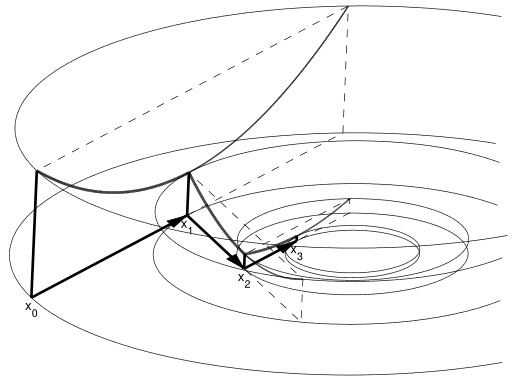 
$$\text{Zdroj: Čermák (2020).}$$ 

V počiatočnej fáze výpočtu, keď sme ešte od minima dosť ďaleko, dochádza obvykle k pomerne rýchlemu poklesu hodnôt účelovej funkcie. Naproti tomu, v blízkosti minima je konvergencia pomalá, iba lineárna, tzn. platí $\left\lVert x_{k+1}-x^* \right\rVert\le C \left\lVert x_k-x^* \right\rVert$, kde konštanta $C$ je síce menšia než $1$ ale často zanedbateľne menšia.  

Pokiaľ je $\lambda_k$ vypočítané presne, potom má funkcia $\varphi(\lambda)$ v bode $\lambda_k$ minimum, a preto 

$$0=\varphi'(\lambda_k)=\displaystyle\sum\limits_{i=1}^{n}\dfrac{\partial f(x_{k+1})}{\partial x_i}d_i^{(k)}=-\displaystyle\sum\limits_{i=1}^{n}d_{i}^{(k+1)}d_i^k=-\mathbf{d}'_{k+1}\mathbf{d}_k,$$ 

t.j. smerové vektory $\mathbf{d}_{k+1}$, $\mathbf{d}_k$ sú navzájom kolmé. Ukážeme, že práve táto vlastnosť môže byť príčinou pomalej konvergencie. 

Pre jednoduchosť predpokladajme, že minimalizujeme funkciu dvoch premenných. V tom prípade si **môžeme pomôcť jednoduchou predstavou**: predstavme si, že sa nachádzame v teréne a chceme nájsť najnižší bod, t.j. dno nejakej priehlbiny resp. nejakého údolia. Metóda najväčšieho spádu nás nasmeruje z počiatočného stanovištia t.j. z bodu $x_0$ dole kolmo k vrstevnici $f(x)=f(x_0)$. Následne zostupujeme tak dlho, pokiaľ terén klesá. V najnižšom bode zostupu je ďalšie stanovište $x_1$. Tu sa zastavíme, otočíme sa o 90 stupňov a zostupujeme opäť dole, kolmo k vrstevnici $f(x)=f(x_1)$ do ďalšieho stanovišťa $x_2$ atď. Je zrejmé, že vzdialenosti medzi jednotlivými stanovišťami sa budú postupne skracovať. V blízkosti minima bude naše putovanie pôsobiť komicky. Totiž miesto toho aby sme do cieľa (t.j. do bodu minima) došli po niekoľkých (málo) krokoch, budeme sa k nemu  iba pomaličky približovať po trase tvorenej čím ďalej - tým kratšími navzájom kolmými úsekmi (pozri nasledujúci obrázok). Tento jav sa zvykne nazývať **_cik-cak efekt_**. 

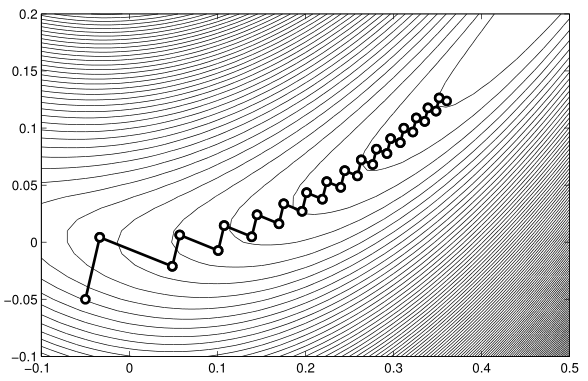 
$$\text{Zdroj: Čermák (2020).}$$ 

**V takom extrémnom prípade metóda najväčšieho spádu zlyháva**, lebo počet krokov potrebný k dosiahnutiu prijateľnej aproximácie minima je neúnosne veľký. Podobná situácia nastáva i v prípade, keď jednorozmernú minimalizáciu realizujeme len približne. 

---

<b> <ins> Algoritmus SD </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $x_0\in\mathbb{R}^n$, $\mathbf{g}_0=\nabla f(x_0)$, $k:=0$; 

**Krok 2**

Pokiaľ $\lVert \mathbf{g}_{k}\rVert\ge\varepsilon$, opakuj: 
 
* vyber $\lambda_k>0$; 


* $\mathbf{d}_k=-\mathbf{g}_k$;


* $x_{k+1}:=x_{k}+\lambda_k\mathbf{d}_k$; 


* $\mathbf{g}_{k+1}:=\nabla f(x_{k+1})$;


* $k:=k+1$; 

**Krok 3**

* $\tilde{x}:=x_k$;

**Krok 4** 

Výstup: $\tilde{x}$.   

--- 

Hodnotu $\lambda_k$ je možné určiť na základe vzťahu $(11)$, prípadne obmedziť minimalizáciu na nejaký rozumný interval $\langle0,s\rangle$ alebo využiť  tzv. _Armijove pravidlo_, v ktorom sa zvolia tri pevné parametre $s>0$, $0<\beta<1$, $0<\sigma<1$, pričom dĺžka kroku je rovná $\lambda_k=\beta^ms$, kde $m$ najmenšie nezáporné číslo také, že platí 

$$f(x_k)-f(x_k-\beta^ms\mathbf{d})\ge-\sigma\beta^ms\nabla f(x_k)'\mathbf{d}.$$

***

#### <font color=blue> Príklad 5 </font> 

Minimum funkcie $f(x,y)=x^2+2y^2+xy-x$ budeme hľadať numericky metódou najväčšieho spádu. Počiatočnú aproximáciu zvolíme $[x_0,y_0]=[1,2]$. Detailne zrealizujeme prvé dva kroky výpočtu. Najprv určíme 

$$\mathbf{g}(x,y)=\begin{pmatrix}2x+y-1\\ x+4y \end{pmatrix} \quad \text{a odtiaľ} \quad \mathbf{d}(x,y)=\begin{pmatrix} -2x-y+1\\ -x-4y\end{pmatrix}.$$ 

Pre 

$$x_0=[1,2] \quad \text{dostaneme} \quad \mathbf{d}_0=\begin{pmatrix}-3 \\ -9 \end{pmatrix}, \quad \text{takže} \quad  x_1=x_0+\lambda_0\mathbf{d}_0=\begin{pmatrix}1-3\lambda_0 \\ 2-9\lambda_0 \end{pmatrix}.$$

Funkcia $\varphi(\lambda)$ je teda v tvare 

$$\varphi(\lambda)=f(x_0+\lambda\mathbf{d}_0)=(1-3\lambda)^2+2(2-9\lambda)^2+(1-3\lambda)(2-9\lambda)-(1-3\lambda)=198\lambda^2-90\lambda+10.$$ 

Minimalizáciu funkcie $\varphi(\lambda)$ je možné zrealizovať presne: z podmienky $\varphi'(\lambda_0)=396\lambda_0-90=0$ dostaneme $\lambda_0=\dfrac{5}{22}$, takže 

$$x_1=[1-3\times5/22, 2-9\times5/22]=\dfrac{1}{22}[7,-1]\doteq[0.318,-0.045].$$ 

Ďalší krok je analogický. Najprv určíme $\mathbf{d}_1$ a následne zapíšeme hľadaný tvar pre $x_2$: 

$$\mathbf{d}_1=\begin{pmatrix}-2\times7/22-(-1/22)+1 \\ -7/22-4\times(-1/22) \end{pmatrix}=\dfrac{1}{22}\begin{pmatrix} 9\\ -3\end{pmatrix}, \quad x_2=x_1+\lambda_1\mathbf{d}_1=\dfrac{1}{22}\begin{pmatrix}7+9\lambda_1 \\ -1-3\lambda_1 \end{pmatrix}.$$ 

Odtiaľ pre $\varphi(\lambda)=f(x_1+\lambda\mathbf{d}_1)$ po úprave dostaneme 

$$\varphi(\lambda)=\dfrac{1}{22^2}\left(72\lambda^2-90\lambda-110\right) \quad \text{a za podmienky} \quad \varphi'(\lambda_1)=0 \quad \text{máme} \quad \lambda_1=\dfrac{5}{8}.$$ 

Dosadením za $\lambda_1$ do $x_2$ nakoniec získame 

$$x_2=\dfrac{1}{176}[101,-23]\doteq[0.574,-0.131].$$

V tomto ilustračnom príklade metóda najväčšieho spádu rýchlo konverguje k presnému riešeniu $\left[x^*,y^*\right]=[4/7,-1/7]$. Už hodnoty $[x_6,y_6]$ sú na 6 desatinných miest presné. 

--- 

<font color=purple> EXTRA: Odkrokujte výpočty z Príkladu 5 v Python-e. Overte, že hodnoty $[x_6,y_6]$ sú naozaj presné na šesť desatinných miest. Za správne riešenie je možné získať jeden bonusový bod. </font> 

**Poznámka o spádových metódach pre riešenie sústav lineárnych rovníc**  

Ak je $\mathbf{A}$ (symetrická) p.d. matica, tak pre funkciu $f(x)=\dfrac{1}{2}x'\mathbf{A}x-x'b$ je $\mathbf{g}(x)=\mathbf{A}x-b$ a $\mathbf{g}'(x)=\mathbf{A}$, takže jediné minimum $x^*$ funkcie $f(x)$ je riešením sústavy lineárnych rovníc $\mathbf{A}x=b$. Pre spádový vektor $\mathbf{d}_k$ počítame $x_{k+1}=x_k+\lambda_k\mathbf{d}_k$, pričom dĺžku $\lambda_k$ kroku vyjadríme z podmienky $0=\varphi'(\lambda_k)=\dfrac{\mathrm{d}}{\mathrm{d}\lambda}f(x_k+\lambda\mathbf{d}_k)\mid_{\lambda=\lambda_k}=\mathbf{d}'\mathbf{A}\mathbf{d}_k\lambda_k-\mathbf{d}_k'\mathbf{r}_k$, kde $\mathbf{r}_k=b-\mathbf{A}x_k$. Takto dostaneme metódu: $x_0$ je dané; $\mathbf{r}_0=b-\mathbf{A}x_0$ pre $k=0,1,2,\ldots$ počítame 

\begin{align*}\label{eq:Optim14} \tag{14}
\mathbf{v}_k=\mathbf{A}\mathbf{d}_k, \quad \lambda_k=\dfrac{\mathbf{d}_k'\mathbf{r}_k}{\mathbf{d}_k'\mathbf{v}_k}, \quad x_{k+1}=x_k+\lambda_K\mathbf{d}_k, \quad \mathbf{r}_{k+1}=\mathbf{r}_k-\lambda_k\mathbf{v}_k. 
\end{align*}

Vzorec pre $\mathbf{r}_{k+1}$ získame tak, že do $\mathbf{r}_{k+1}=\mathbf{b}-\mathbf{A}x_{k+1}$ dosadíme $x_{k+1}=x_k+\lambda_k\mathbf{d}_k$. Výpočet ukončíme, keď je reziduum $\mathbf{r}_k$ dostatočne malé, t.j. keď $\lVert \mathbf{r}_{k+1} \rVert<\varepsilon$. V metóde najväčšieho spádu $\mathbf{d}_k=-\mathbf{g}(x_k)=\mathbf{r}_k$. V praxi sa však táto metóda často nepoužíva, lebo konverguje pomaly. Existuje lepšia voľba: ak položíme $\mathbf{d}_0=\mathbf{r}_0$ a počítame $\mathbf{d}_{k+1}$ pre $k\ge0$ zo vzťahu $\mathbf{d}_{k+1}=\mathbf{r}_{k+1}+\beta_k\mathbf{d}_k$, kde $\beta_k=\left(\mathbf{r}_{k+1}'\mathbf{r}_{k+1}\right)/\left(\mathbf{r}'_k\mathbf{r}_k\right)$, tak dostaneme **_metódu združených gradientov (CG)_**, ktorá konverguje podstatne rýchlejšie. 

---

<b> <ins> Algoritmus CG </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $x_0\in\mathbb{R}^n$, $\mathbf{r}_0=\mathbf{A}\mathbf{x}_0-\mathbf{b}$, $\mathbf{d}_0=\mathbf{r}_0$ $k:=1$; 

**Krok 2**

Pokiaľ $\lVert \mathbf{r}_{k-1}\rVert\ge\varepsilon$, opakuj: 
 
* $\lambda_k:=\dfrac{\lVert\mathbf{r}_{k-1}\rVert^2}{\mathbf{d}_k'\mathbf{A}\mathbf{d}_k}$; 


* $x_{k}:=x_{k-1}-\lambda_k\mathbf{d}_k$; 


* $\mathbf{r}_k:=\mathbf{r}_{k-1}-\lambda_k\mathbf{A}\mathbf{d}_k$;


* $\beta_k:=\dfrac{\lVert\mathbf{r}_k\rVert^2}{\lVert\mathbf{r}_{k-1}\rVert^2}$;


* $\mathbf{d}_{k+1}:=\mathbf{r}_k+\beta_k\mathbf{d}_k$;


* $k:=k+1$; 

**Krok 3**

* $\tilde{x}:=x_k$;

**Krok 4** 

Výstup: $\tilde{x}$.   

---

Teraz popíšeme **všeobecnejší algoritmus metódy združených gradientov** pre nelineárnu funkciu (CGN). Konkrétne ide o to, že funkcia $f(x)$ nemusí byť kvadratická v tvare $f(x)=\dfrac{1}{2}x'\mathbf{A}x-x'b$, ako to bolo uvedené vyššie. Postačí, keď  bude uvažovaná funkcia diferencovateľná a budeme schopní nájsť alebo aspoň aproximovať jej gradient. Pre minimalizáciu funkcie, ktorá nie je kvadratická, je potrebných niekoľko úprav algoritmu CG. 


---

<b> <ins> Algoritmus CGN </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $x_0\in\mathbb{R}^n$, $\mathbf{g}_0=\nabla f(x_0)$, $\mathbf{d}_0=\mathbf{g}_0$ $k:=1$; 

**Krok 2**

Pokiaľ $\lVert \mathbf{g}_{k-1}\rVert\ge\varepsilon$, opakuj: 
 
* $\lambda_k:=\underset{\lambda>0}{\arg\min}\,f(x_{k-1}-\lambda\mathbf{d}_k)$; 


* $x_{k}:=x_{k-1}-\lambda_k\mathbf{d}_k$; 


* $\mathbf{g}_k:=\nabla f(x_k)$;


* $\beta_k:=\dfrac{\lVert\mathbf{g}_k\rVert^2}{\lVert\mathbf{g}_{k-1}\rVert^2}$ (Fletcher-Reeves) alebo $\beta_k:=\dfrac{\mathbf{g}_k'(\mathbf{g}_k-\mathbf{g}_{k-1})}{\lVert\mathbf{g}_{k-1}\rVert^2}$ (Polak-Ribiere);


* $\mathbf{d}_{k+1}:=\mathbf{g}_k+\beta_k\mathbf{d}_k$;


* $k:=k+1$; 

**Krok 3**

* $\tilde{x}:=x_k$;

**Krok 4** 

Výstup: $\tilde{x}$.   

---

***

#### <font color=blue> Príklad 6 </font> 

V tomto príklade ilustrujeme numerický výpočet minima funkcie z Príkladu 3, následne i z Príkladu 4 a to aplikovaním metódy združených gradientov. 

In [49]:
# Priklad 3 
from scipy import optimize

f = lambda x: 70*((x[0]-2)**4+(x[0]-2*x[1])**2) 
x0 = [2.2,0.7] # zmena v prvej pociatocnej suradnici z 2.1 na 2.2 

res1 = optimize.minimize(f, x0, method='CG', tol=1e-04) 
print(res1)

     fun: 3.2988016529674096e-08
     jac: array([-2.16177170e-05, -7.14675551e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 13
    njev: 34
  status: 0
 success: True
       x: array([1.99534077, 0.99767036])


In [44]:
# Priklad 4 
from scipy.optimize import minimize, rosen, rosen_der 

x0 = [1.3, 0.7, 0.8, 1.9, 1.2] 
res2 = minimize(rosen, x0, method='CG', tol=1e-4)
res2

     fun: 1.6659906246694824e-08
     jac: array([-5.18016364e-06, -3.67349719e-05, -5.41614162e-05, -8.15714050e-05,
       -8.10349749e-05])
 message: 'Optimization terminated successfully.'
    nfev: 726
     nit: 59
    njev: 121
  status: 0
 success: True
       x: array([0.99998605, 0.99997207, 0.99994408, 0.99988802, 0.99977564])

--- 

## Newtonova metóda

Je gradientná (spádová) metóda, ktorá sa pokúša nájsť bod minima $x^*$ ako riešenie sústavy nelineárnych rovníc $\mathbf{g}(x)=\mathbf{0}$ Newtonovou metódou. Takým riešením môže byť každý stacionárny bod funkcie $f$ (bod $x^*$, v ktorom pre funkciu $f$ platí $\nabla f\left(x^*\right)=\mathbf{0}$, sa nazýva _stacionárny bod_ funkcie $f$), teda môže ísť aj o bod maxima alebo o sedlový bod (obdoba inflexného bodu pre funkciu jednej premennej). Budeme potrebovať Jacobiho maticu pre $\nabla f$, t.j. 

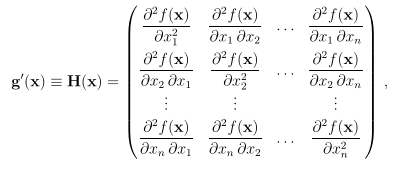 

ktorá sa v tomto prípade nazýva **_Hessova matica_** funkcie $f$. Výpočet prebieha nasledovne: nájdeme riešenie $\mathbf{d}_k$ sústavy lineárnych rovníc 

\begin{align*}\label{eq:Optim15} \tag{15}
\mathbf{H}(x_k)\mathbf{d}_k=-\mathbf{g}(x_k) \quad \text{a následne určíme} \quad x_{k+1}=x_k+\mathbf{d}_k, \text{ pričom } \mathbf{g}(x_k)=\nabla f(x_k).
\end{align*}

Všimnime si, že vzorec \eqref{eq:Optim15} pre $x_{k+1}$ je formálne rovnaký ako vzorec $(10)$, keď v ňom položíme $\lambda_k=1$. Pre ukončenie výpočtu sa aplikuje stop kritérium $(13)$. Smerový vektor 

\begin{align*}\label{eq:Optim16} \tag{16}
\mathbf{d}_k=-\mathbf{H}^{-1}(x_k)\mathbf{g}(x_k)
\end{align*} 

vo všeobecnosti nie je spádový. Dá sa však ukázať, že v blízkosti minima vektor $\mathbf{d}_k$ spádový je. 

Nasleduje prehľadný zápis Newtonovho algoritmu (N). 

---

<b> <ins> Algoritmus N </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $x_0\in\mathbb{R}^n$, $k:=1$; 

**Krok 2**

Pokiaľ $\lVert \nabla f(x_k)\rVert\ge\varepsilon$, opakuj: 
 
* nájdi $\mathbf{d}_k$ ako riešenie rovnice $\mathbf{H}(x_k)\mathbf{d}_k=-\mathbf{g}(x_k)$, kde $\mathbf{g}(x_k)=\nabla f(x_k)$ resp. polož $\mathbf{d}_k:=-\mathbf{H}^{-1}(x_k)\mathbf{g}(x_k)$; 


* $x_{k+1}=x_k+\mathbf{d}_k$; 


* $k:=k+1$; 

**Krok 3**

* $\tilde{x}:=x_k$;

**Krok 4** 

Výstup: $\tilde{x}$.   

---

--- 

#### Poznámka 10

* O Newtonovej metóde je známe, že konverguje, ak je počiatočná aproximácia $x_0$ dostatočne blízko riešenia $x^*$ a v tom prípade je konvergencia metódy rýchla - konkrétne kvadratická. Na druhej strane, pokiaľ $x_0$ nie je dostatočne blízko ku $x^*$, Newtonova metóda nemusí vôbec konvergovať. Tým pádom sa prirodzene núka možnosť **začať výpočet metódou najväčšieho spádu a dokončiť tento výpočet Newtonovou metódou**. Uvedený poznatok je východiskom pre odvodenie mnohých efektívnych metód. Medzi nich patria napr. tzv. _Kvázi-Newtonovské metódy_. 

---

***

#### <font color=blue> Príklad 7 </font> 

V tomto príklade ilustrujeme numerický výpočet minima funkcie z Príkladu 3, následne aj z Príkladu 4 a to aplikovaním Newtonovej metódy združených gradientov. 

In [40]:
# Priklad 3
f = lambda x: 70*((x[0]-2)**4+(x[0]-2*x[1])**2) 
x0 = [2.1,0.7] 
# definujeme vektor resp. zoznam (parcialnych) derivaci prveho radu funkcie f (t.j. gradient funkcie f pripadne Jacobian) 
def f_der(x): 
    der = np.zeros_like(x) 
    der[0] = 70*(4*(x[0]-2)**3+2*(x[0]-2*x[1])) 
    der[1] = -280*(x[0]-2*x[1])
    return der 
    
res1 = minimize(f, x0, method='Newton-CG', jac=f_der, options={'xtol': 1e-8, 'disp': True}) 
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 55
         Hessian evaluations: 0
     fun: 9.961242809898282e-11
     jac: array([-7.84381253e-07,  8.39135437e-07])
 message: 'Optimization terminated successfully.'
    nfev: 13
    nhev: 0
     nit: 12
    njev: 55
  status: 0
 success: True
       x: array([1.9989078, 0.9994539])


In [42]:
# Priklad 4 
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess 

res2 = minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, options={'xtol': 1e-8, 'disp': True}) 
print(res2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 9
     fun: 4.508430231477707e-16
     jac: array([ 7.00642928e-06, -3.51743554e-06])
 message: 'Optimization terminated successfully.'
    nfev: 10
    nhev: 9
     nit: 9
    njev: 10
  status: 0
 success: True
       x: array([0.99999998, 0.99999996])


In [ ]:
# definovanie Jacobiho matice resp. gradientu a Hessovej matice pre Rosenbrockovu funkciu 
# v predchadzajucom vypocte su tieto funkcie nacitane priamo z balika SciPy 

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

--- 

--- 

#### Poznámka 11

* Mierne odlišný pohľad na Newtonovu metódu je taký, že vychádza sa z kvadratického modelu (Taylorov rozvoj) pre $f$ definovaného v okolí iterácie $x_k$, konkrétne $f(x)\approx m(x)=m_k(x)=f(x_k)+(x-x_k)'\nabla f(x_k)+\dfrac{1}{2}(x-x_k)'\nabla^2f(x_k)(x-x_k)$, pričom minimum $m$ sa dosahuje v bode $x$, pre ktorý platí $\nabla m(x)=\mathbf{0}$, tzn. $\nabla f(x_k)+\nabla^2f(x_k)(x-x_k)=\mathbf{0}$, odkiaľ dostávame tzv. "Newtonov krok" v tvare $x_{k+1}=x_k-\left[\nabla^2f(x_k)\right]^{-1}\nabla f(x_k)$.


* Jeden z aspektov pre zaručenie globálnej konvergencie Newtonovej metódy spočíva v zaistení pozitívnej definitnosti Hessiánu (resp. Hessiánov v jednotlivých iteráciách) a tým sa zabezpečí konvexnosť kvadratickej aproximácie, z ktorej vychádza Newtonova metóda resp., z ktorej sa odvodí tzv. "Newtonov krok" $(15)$. Existuje niekoľko možností: Nahradenie Hessiánu vhodným násobkom jednotkovej diagonálnej matice; zistenie spektra (rozloženie vlastných čísel) Hessiánu napr. aplikovaním [Gerschgorinovej vety](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) a následné pripočítanie vhodného násobku matice identity k Hessiánu, čím získame jeho aproximáciu, ktorá už bude pozitívne definitná; využitie Choleskeho rozkladu ... ďalšie chytré pozitívne definitné aproximácie Hessiánu sú základom pre tzv. _Kvázi-Newtonovské metódy_ uvedené v záverečnej časti textu. 
---

## Kvázi-Newtonovské metódy

Ide o skupinu metód využívajúcich pri minimalizácii funkcie tzv. **"Newtonov krok"**. Na rozdiel od Newtonovej metódy je **informácia druhého rádu aproximovaná na základe gradientu z predošlej iterácie**. Informáciou druhého rádu sa myslí druhá derivácia v prípade funkcie jednej premennej a Hessián (Hessova matica) v prípade funkcie viacerých premenných. Pre účely aproximácie informácie druhého rádu pri funkcii jednej premennej sa využije tzv. metóda sečníc určená na hľadanie približného riešenia rovnice $f(x)=0$. V prípade funkcie viacerých premenných sa využije zovšeobecnený vzťah z metódy sečníc a v kombinácii s ďalšími poznatkami sa vybuduje **pozitívne definitná aproximácia Hessiánu na základe znalosti gradientu funkcie z predchádzajúcej iterácie**.   

Výpočet tu prebieha podobne ako pri metóde najväčšieho spádu. Smerový vektor $\mathbf{d}_k$ je však v tvare $\mathbf{d}_k=-\mathbf{B}_k\mathbf{g}(x_k)$. Matice $\mathbf{B}_k$ sa vyberajú tak, aby vektor $\mathbf{d}_k$ bol spádový. Pre $k=0$ je $\mathbf{B}_0=\mathbf{I}$, takže $\mathbf{d}_0=-\mathbf{g}(x_0)$ je smer metódy najväčšieho spádu. Čím viac sa $x_k$ blíži k bodu minima, tým je $\mathbf{B}_k$ lepšou aproximáciou $\mathbf{H}^{-1}(x_k)$, takže $\mathbf{d}_k$ sa blíži k smerovému vektoru $-\mathbf{H}^{-1}(x_k)\mathbf{g}(x_k)$ z Newtonovej metódy. Je to iba hrubý popis základnej myšlienky. 

Konkrétnym príkladom uvedeného typu metódy je tzv. **_Davidonova-Fletcherova-Powellova metóda_** **(DFP metóda)**, kde $\mathbf{B}_k$ je symetrická, pozitívne definitná matica a následne $\mathbf{B}_{k+1}$ je tiež symetrická, pozitívne definitná matica. Táto metóda sa dá charakterizovať nasledujúcimi vzťahmi: 

\begin{align*}\label{eq:Optim17} \tag{17}
x_{k+1}=x_k-\mathbf{B}_k^{-1}\nabla f\left(x_k\right);
\end{align*}

\begin{align*}\label{eq:Optim18} \tag{18}
\mathbf{y}=\nabla f\left(x_{k+1}\right)-\nabla f\left(x_k\right), \quad \mathbf{d}=x_{k+1}-x_k;
\end{align*} 

\begin{align*}\label{eq:Optim19} \tag{19}
\mathbf{B}_{k+1}=\left(\mathbf{I}-\dfrac{\mathbf{y}\mathbf{d}'}{\mathbf{y}'\mathbf{d}}\right)\mathbf{B}_k\left(\mathbf{I}-\dfrac{\mathbf{d}\mathbf{y}'}{\mathbf{y}'\mathbf{d}}\right)+\dfrac{\mathbf{y}\mathbf{y}'}{\mathbf{y}'\mathbf{d}}. 
\end{align*}

Dá sa ukázať (podobnými technikami ako pri analýze [Broydenovej metódy](https://en.wikipedia.org/wiki/Broyden%27s_method)), že 

$$\mathbf{H}_{k+1}=\mathbf{H}_k+\dfrac{\mathbf{d}\mathbf{d}'}{\mathbf{d}'\mathbf{y}}-\dfrac{\mathbf{H}_k\mathbf{y}\mathbf{y}'\mathbf{H}_k}{\mathbf{y}'\mathbf{H}_k\mathbf{y}},$$

kde $\mathbf{H}_k=\mathbf{B}_k^{-1}$, potom $\mathbf{H}_{k+1}=\mathbf{B}_{k+1}^{-1}$. Tým pádom je možné DFP metódu implementovať nasledovne: 

\begin{align*}\label{eq:Optim20} \tag{20}
x_{k+1}=x_k-\mathbf{H}_k\nabla f\left(x_k\right); 
\end{align*}

\begin{align*}\label{eq:Optim21} \tag{21}
\mathbf{y}=\nabla f\left(x_{k+1}\right)-\nabla f\left(x_k\right), \quad \mathbf{d}=x_{k+1}-x_k;
\end{align*} 

\begin{align*}\label{eq:Optim22} \tag{22}
\mathbf{H}_{k+1}=\mathbf{H}_k+\dfrac{\mathbf{d}\mathbf{d}'}{\mathbf{d}'\mathbf{y}}-\dfrac{\mathbf{H}_k\mathbf{y}\mathbf{y}'\mathbf{H}_k}{\mathbf{y}'\mathbf{H}_k\mathbf{y}}. 
\end{align*} 

V tomto prípade je $x_0$ štartovací bod (počiatočný odhad bodu minima) a $\mathbf{H}_0$ je rovné buď $\left(\nabla^2f\left(x_0\right)\right)^{-1})$ alebo nejakej dobrej aproximácii výrazu $\left(\nabla^2f\left(x_0\right)\right)^{-1})$. 

---

<b> <ins> Algoritmus DFP </ins> </b> 

**Krok 1** 

Vstup: $\varepsilon>0$ (presnosť), $x_0\in\mathbb{R}^n$, $\mathbf{g}_0:=\nabla f(x_0)$, $\mathbf{H}_0:=\mathbf{I}$ (jednotková diagonálna matica) alebo $\mathbf{H}_0:=\left(\nabla^2f\left(x_0\right)\right)^{-1}$ (prípadne aproximácia), $k:=1$; 

**Krok 2**

Pokiaľ $\lVert g_k\rVert\ge\varepsilon$, opakuj: 
 
* $x_{k+1}:=x_k-\mathbf{H}_{k}^{-1}\mathbf{g}_k$ (Newtonov krok); 


* $\mathbf{g}_{k+1}=\nabla f(x_{k+1})$; 


* $\mathbf{y}=\mathbf{g}_{k+1}-\mathbf{g}_k$;


* $\mathbf{d}=\mathbf{x}_{k+1}-\mathbf{x}_k$; 


* ak $\mathbf{d}'\mathbf{y}>0$: $\mathbf{H}_{k+1}:=\mathbf{H}_k+\dfrac{\mathbf{d}\mathbf{d}'}{\mathbf{d}'\mathbf{y}}-\dfrac{\mathbf{H}_k\mathbf{y}\mathbf{y}'\mathbf{H}_k}{\mathbf{y}'\mathbf{H}_k\mathbf{y}}$ (symetrická pozitívne definitná aproximácia Hessiánu); 

    * ináč $\mathbf{H}_{k+1}:=\mathbf{H}_k$; 
    

* $k:=k+1$; 

**Krok 3**

* $\tilde{x}:=c_k$;

**Krok 4** 

Výstup: $\tilde{x}$.   

---

Existujú však i lepšie optimalizačné metódy tohto typu - napr. **Broydenova-Fletcherova-Goldfarbova-Shannova metóda** **(BFGS metóda)**, kde kľúčový aktualizačný krok je daný vzťahom 

\begin{align*}\label{eq:Optim23} \tag{23}
\tilde{\mathbf{H}}_{k+1}:=\tilde{\mathbf{H}}_k+\dfrac{\mathbf{y}\mathbf{y}'}{\mathbf{y}'\mathbf{d}}-\dfrac{\tilde{\mathbf{H}}_k\mathbf{d}\mathbf{d}'\tilde{\mathbf{H}}_k}{\mathbf{d}'\tilde{\mathbf{H}}_k\mathbf{d}}, 
\end{align*}

kde $\tilde{\mathbf{H}}_k$ je $k$-ta aproximácia inverzie $\left(\mathbf{B}^{-1}_{k}\right)$ BFGS aktualizačného kroku, pričom $\mathbf{y}$ a $\mathbf{d}$ sú dané vzťahom $(21)$. 

***

#### <font color=blue> Príklad 8 </font>  

In [5]:
from scipy.optimize import minimize, rosen 

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der 

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True}) 

res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

In [6]:
def rosen_and_der(x):
    objective = sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return objective, der 

res = minimize(rosen_and_der, x0, method='BFGS', jac=True, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


--- 

***

#### <font color=blue> Príklad 9 </font> 

Na testovanie kvality minimalizačných metód sa používa okrem iných aj tzv. banánová (Rosenbrockova) funkcia $f(x,y)=100\left(y-x^2\right)^2+(1-x)^2$. Priebeh funkcie (viď graf nižšie) $f$ pripomína hlbokú roklinu so strmými stenami, ktorej zakrivené dno popísané rovnicou $y=x^2$ (vzdialene pripomínajúce banán) sa iba veľmi mierne zvažuje k minimu v bode $\left[x^*,y^*\right]=[1,1]$. 

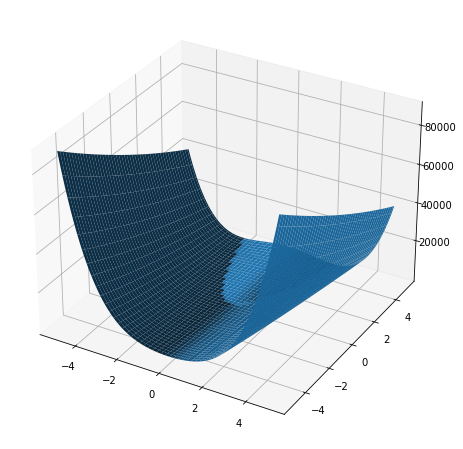

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
banana_function = lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2
x = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, x)
fig2=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, banana_function([X, Y]))
plt.show()

Hľadajme minimum Newtonov metódou, t.j. sústavu rovníc 

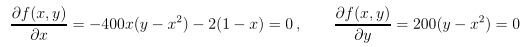 

riešime [Newtonovou metódou](https://kurzy.kpi.fei.tuke.sk/nm/student/03.html): v každom kroku vypočítame $a_k,b_k$ zo sústavy rovníc 

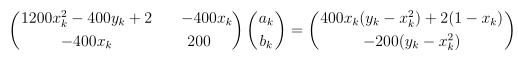 

a následne určíme ďalšiu aproximáciu 

$$x_{k+1}=x_k+a_k, \quad y_{k+1}=y_k+b_k.$$

Pre numerický experiment zvolíme počiatočnú aproximáciu $[x_0,y_0]=[3,2]$. 

In [56]:
# vypocet nelinearnej sustavy rovnic v Python-e (priklad)
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])
print(root)

np.isclose(func(root), [0.0, 0.0])  # func(root) should be almost 0.0. 

[6.50409711 0.90841421]


array([ True,  True])

In [60]:
# Nelderova-Meadova metoda 
x0 = [3,2]
res1 = optimize.minimize(banana_function, x0, method='Nelder-Mead', tol=1e-06) 
print(res1)

 final_simplex: (array([[1.00000019, 1.00000039],
       [0.99999984, 0.99999965],
       [1.00000015, 1.00000028]]), array([4.77553850e-14, 5.97271139e-14, 1.19661234e-13]))
           fun: 4.775538495964796e-14
       message: 'Optimization terminated successfully.'
          nfev: 156
           nit: 81
        status: 0
       success: True
             x: array([1.00000019, 1.00000039])


In [61]:
# metoda zdruzenych gradientov 
x0 = [3,2]
res2 = optimize.minimize(banana_function, x0, method='CG', tol=1e-06) 
print(res2)

     fun: 2.970917797419776e-11
     jac: array([-9.10987451e-07, -5.16439891e-07])
 message: 'Optimization terminated successfully.'
    nfev: 104
     nit: 14
    njev: 34
  status: 0
 success: True
       x: array([0.99999455, 0.99998909])


In [66]:
# Newtonova metoda zdruzenych gradientov (na vstupe tiez derivacie prveho radu bananovej funkcie)
x0 = [3,2] 

def banana_function_derivatives(x): 
    der = np.zeros_like(x) 
    der[0] = -400*(x[1]-x[0]**2)*x[0]-2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der 

res3 = minimize(banana_function, x0, method='Newton-CG', jac=banana_function_derivatives, options={'xtol': 1e-6, 'disp': True}) 
print(res3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 41
         Gradient evaluations: 95
         Hessian evaluations: 0
     fun: 7.905590027712506e-18
     jac: array([ 2.41438436e-06, -1.20197252e-06])
 message: 'Optimization terminated successfully.'
    nfev: 41
    nhev: 0
     nit: 28
    njev: 95
  status: 0
 success: True
       x: array([1.        , 1.00000001])


In [69]:
# Newtonova metoda zdruzenych gradientov (na vstupe tiez derivacie prveho i druheho radu bananovej funkcie)

x0 = [3,2] 

def banana_function_hess_matrix(x): 
    diag = np.zeros_like(x) 
    H = np.diag(diag)
    H[0,0] = 1200*x[0]**2-400*x[1]+2
    H[1,1] = 200
    H[0,1] = -400*x[0]
    H[1,0] = -400*x[0]
    return H 

res3 = minimize(banana_function, x0, method='Newton-CG', jac=banana_function_derivatives, hess=banana_function_hess_matrix, options={'xtol': 1e-6, 'disp': True}) 
print(res3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 42
         Gradient evaluations: 42
         Hessian evaluations: 26
     fun: 8.189746594292906e-19
     jac: array([ 3.36516276e-07, -1.67017911e-07])
 message: 'Optimization terminated successfully.'
    nfev: 42
    nhev: 26
     nit: 26
    njev: 42
  status: 0
 success: True
       x: array([1., 1.])


--- 

--- 

#### Poznámka 12

Riešenie $x^*$ sústavy $n$ nelineárnych rovníc $\mathbf{f}(x)=\mathbf{0}$ môžeme získať ako bod, v ktorom funkcia $h(x)=\displaystyle\sum\limits_{i=1}^{n}\left[f_i(x)\right]^2$ (t.j. súčet štvorcov reziduií) nadobúda svoje globálne minimum (lebo $0=h\left(x^*\right)=\underset{x\in\mathbb{R}^n}{\min}\,h(x)$ práve vtedy, keď $\mathbf{f}\left(x^*\right)=\mathbf{0}$). Na minimalizáciu funkcie $h(x)$ je možné aplikovať niektorý z algoritmov pre riešenie [nelineárnej úlohy najmenších štvorcov](https://bookdown.org/mike/data_analysis/non-linear-regression.html#non-linear-least-squares) (alebo pozri [sem](http://www2.imm.dtu.dk/pubdb/edoc/imm3215.pdf)). 

---

<font color=purple> EXTRA: Vykreslite graf funkcie $g(x) = \sin(xy) + \cos(x + y)$, $[x,y] \in \langle−1,2\rangle \times \langle0,3\rangle$. Aplikujte tri prístupy ako v Príklade 9 pre nájdenie lokálnych miním tejto funkcie. Experimentujte so štartovacími bodmi a prístupy porovnjate. Správne vyriešená úloha môže byť ocenená jedným bonusovým bodom. </font> 

--- 

#### Poznámka 13

Niektoré dôležité účelové funkcie sú síce diferencovateľné, avšak nie je možné zadať explicitné pravidlo pre výpočet gradientu (napr. úloha [tvarovej optimalizácie v mechanike](https://www.ljll.math.upmc.fr/frey/cours/EAFIT/shapeOptim.pdf)). V tom prípade je vhodné aplikovať [numerické derivovanie pre aproximáciu derivácií](https://rh8liuqy.github.io/Finite_Difference.html) (aj vyššieho rádu), ktoré sú súčasťou gradientu, Hessiánu, Jacobiho matice a pod. (prípadne pozrite [doplnkový materiál](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/AproximaciaGradientuKonecnymiDiferenciami.pdf)).  

---

<font color=purple> EXTRA: Naprogramujte (jednu) vybranú iteračnú optimalizačnú metódu na hľadanie extrémov funkcie tak, aby výsledkom bol interaktívny kód, kde bude možné nastaviť vstupné parametre, metódu odkrokovať a sledovať graficky, čo sa deje v jednotlivých iteráciách. V prípade korektného, okomentovaného kódu je možné získať 1 bonusový bod. </font> 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 
